# **Business Problem**

It is expected that a machine learning model will be developed that can predict customers who will leave the company.

# **Dataset Story**

Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 customers in California in the third quarter. It shows which customers left, stayed, or signed up for their service.

* **CustomerId:** Customer Id
* **Gender:** Gender
* **SeniorCitizen:** Whether the customer is elderly (1, 0)
* **Partner:** Whether the customer has a partner (Yes, No)
* **Dependents:** Whether the customer has dependents (Yes, No)
* **Tenure** Number of months the customer has been with the company
* **PhoneService:** Whether the customer has phone service (Yes, No)
* **MultipleLines:** Whether the customer has more than one line (Yes, No, No phone service)
* **InternetService:** Whether the customer has internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity:** Whether the customer has online security (Yes, No, No internet service)
* **OnlineBackup:** Whether the customer has online backup (Yes, No, No internet service)
* **DeviceProtection:** Whether the customer has device protection (Yes, No, No internet service)
* **TechSupport:** Whether the customer has technical support (Yes, No, No internet service)
* **StreamingTV:** Whether the customer has streaming TV (Yes, No, No Internet service)
* **StreamingMovies:** Whether the customer streams movies (Yes, No, No internet service)
* **Contract:** Whether the customer's contract term (Month-to-month, One year, Two years)
* **PaperlessBilling:** Whether the customer has paperless billing (Yes, No)
* **PaymentMethod:** Whether the customer's payment method (Electronic check, Postal check, Wire transfer (automatic), Credit card (automatic))
* **MonthlyCharges:** The amount charged to the customer monthly
* **TotalCharges:** The total amount charged to the customer
* **Churn:** Whether the customer uses (Yes or No)

# **Road Map**

* 1. Import Required Libraries

* 2. Adjusting Row Column Settings

* 3. Loading the data Set

* 4. Exploratory Data Analysis

* 5. Capturing / Detecting Numeric and Categorical Variables

* 6. Analysis of Categorical Variables

* 7. Analysis of Numerical Variables

* 8. Analysis of Numeric Variables by Target

* 9. Analysis of Categorical Variables by Target

* 10. Correlation Analysis

* 11. Distribution of the Dependent Variable
      
* 12. Examining the Logarithm of the Dependent Variable

* 13. Feature Engineering

* 14. Missing Value Analysis

* 15. Outlier Analysis

* 16. Base Model

* 17. Comparison of Metrics for Different Models Before Feature Engineering

* 18. Feature Importance For Base Model

* 19. Feature Extraction

* 20. ENCODING

* 21. Standardization Process

* 22. Creating Model

* 23. Comparison of Metrics for Different Models After Feature Engineering

* 24. Feature Importance

* 25. Metric Improvement Comparison After Feature Engineering

* 26. Hyperparameter Optimization

# **1. Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go
import time

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.simplefilter(action="ignore")

# **2. Adjusting Row Column Settings**

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **3. Loading the Dataset**

In [3]:
df = pd.read_csv('Telco_Customer_Churn.csv')

# **4. Exploratory Data Analysis**

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    numeric_df = df.select_dtypes(include='number')
    # quantile() işlemi
    quantiles = numeric_df.describe([0, 0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1]).T
    print(quantiles)

In [5]:
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
                     ...   
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Length: 21, dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines Inter

In [6]:
# We changed the type of the TotalCharges variable.

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [7]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("O")

In [8]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [9]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [10]:
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})

In [11]:
df["InternetService"] = df["InternetService"].replace({"DSL": 1, "Fiber optic": 1, "No": 0})

In [12]:
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService     MultipleLines  InternetService OnlineSecurity  \
0                0  No phone service                1             No   
1                1                No                1            Yes   
2                1                No                1            Yes   
3                0  No phone service                1            Yes   
4                1                No                1             No   
...            ...               ...              ...            ...   
7038             1               Yes                1            Yes   
7039             1               Yes                1             No   
7040             0  No phone service                1            Yes   
7041             1               Yes                1             No   
7042             1                No                1            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract  PaperlessBilling              PaymentMethod  \
0     Month-to-month                 1           Electronic check   
1           One year                 0               Mailed check   
2     Month-to-month                 1               Mailed check   
3           One year                 0  Bank transfer (automatic)   
4     Month-to-month                 1           Electronic check   
...              ...               ...                        ...   
7038        One year                 1               Mailed check   
7039        One year                 1    Credit card (automatic)   
7040  Month-to-month                 1           Electronic check   
7041  Month-to-month                 1               Mailed check   
7042        Two year                 1  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges  Churn  
0             29.850        29.850      0  
1             56.950      1889.500      0  
2             53.850       108.150      1  
3             42.300      1840.750      0  
4             70.700       151.650      1  
...              ...           ...    ...  
7038          84.800      1990.500      0  
7039         103.200      7362.900      0  
7040          29.600       346.450      0  
7041          74.400       306.600      1  
7042         105.650      

# **5. Capturing / Detecting Numeric and Categorical Variables**

In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [14]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 7


In [15]:
cat_cols

['gender',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'InternetService',
 'PaperlessBilling',
 'Churn']

In [16]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
cat_but_car

['customerID']

In [18]:
num_but_cat

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'InternetService',
 'PaperlessBilling',
 'Churn']

In [19]:
cat_cols = [col for col in cat_cols if col not in ["Churn"]]

# **6. Analysis of Categorical Variables**

In [20]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [21]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")
        plt.show(block=True)

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################


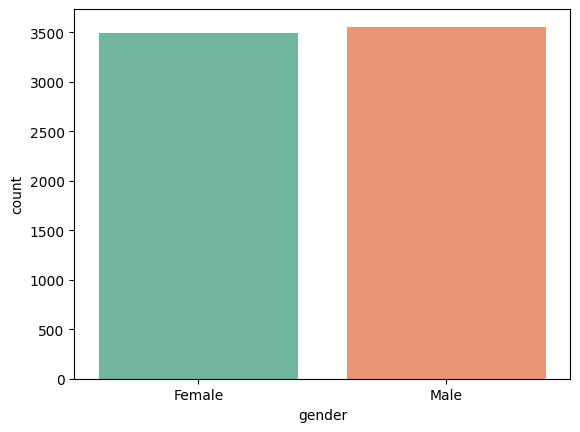

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


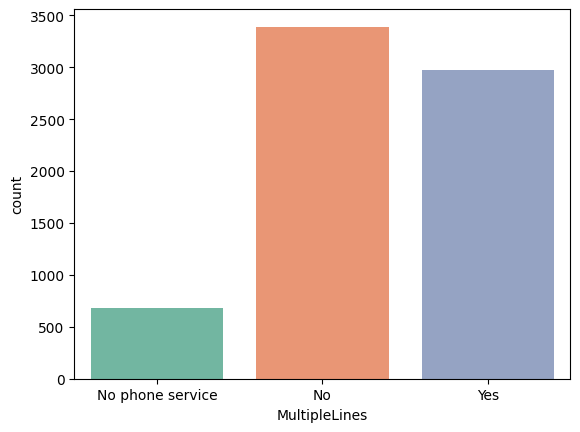

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


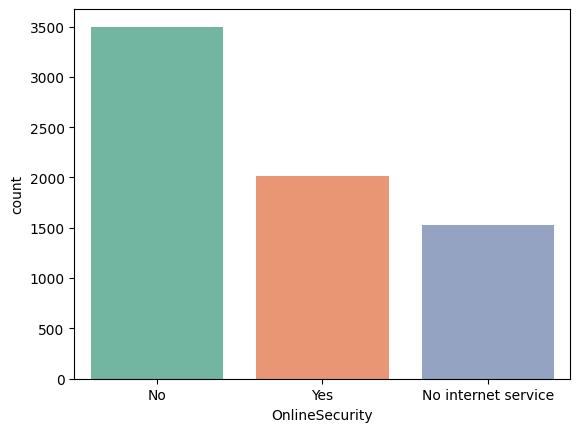

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


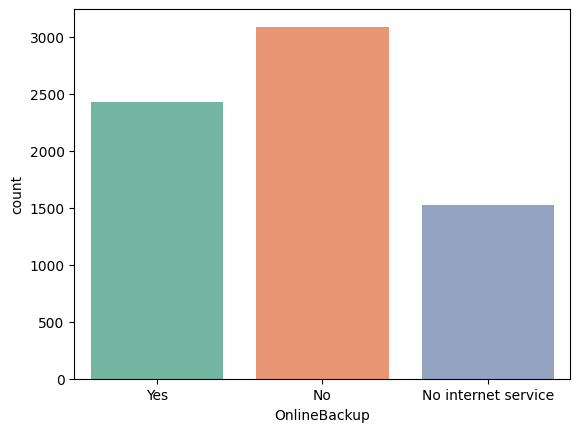

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


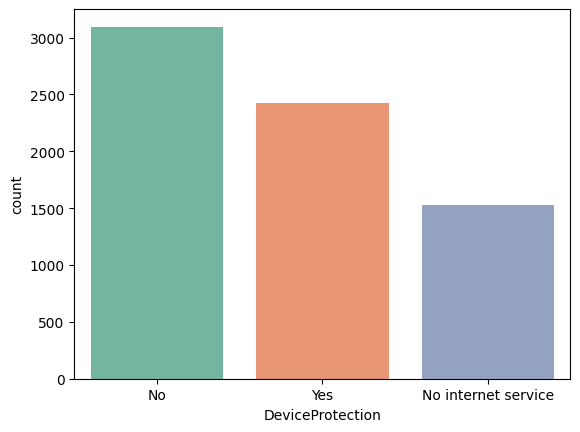

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


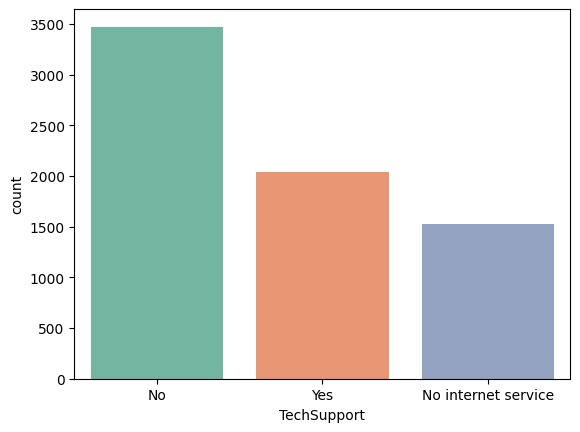

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


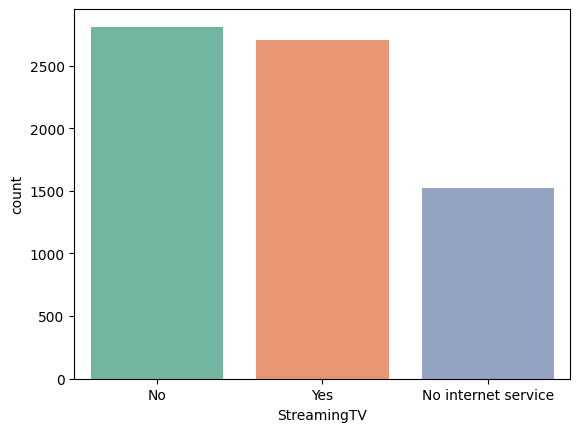

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


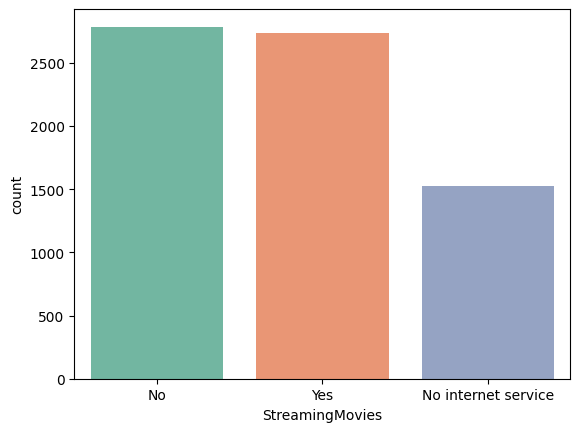

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


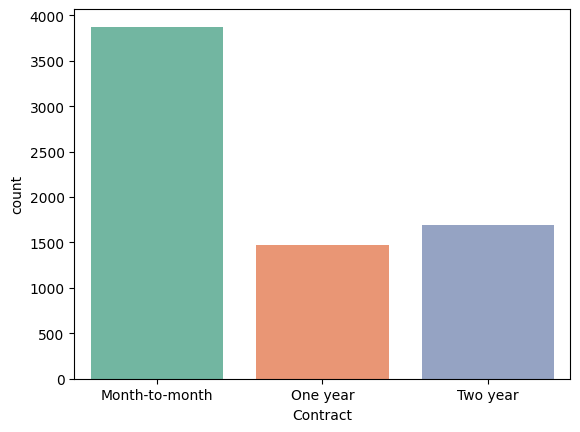

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


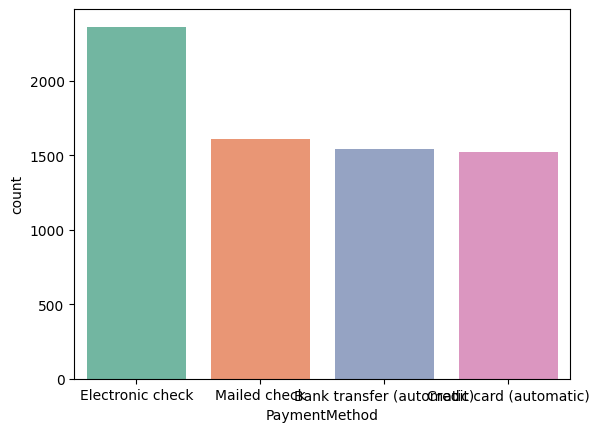

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
##########################################


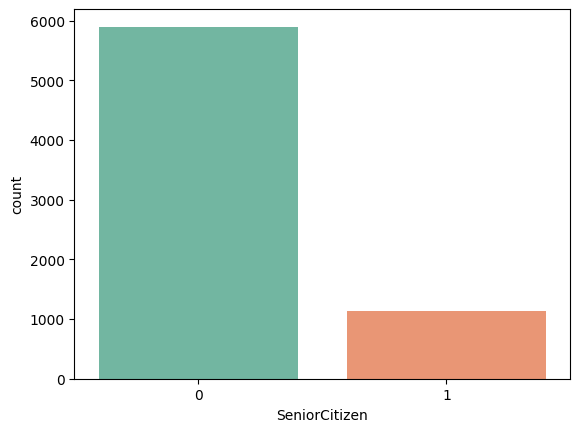

         Partner  Ratio
Partner                
0           3641 51.697
1           3402 48.303
##########################################


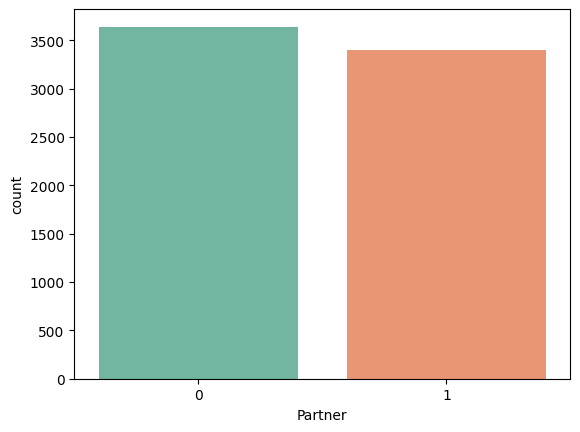

            Dependents  Ratio
Dependents                   
0                 4933 70.041
1                 2110 29.959
##########################################


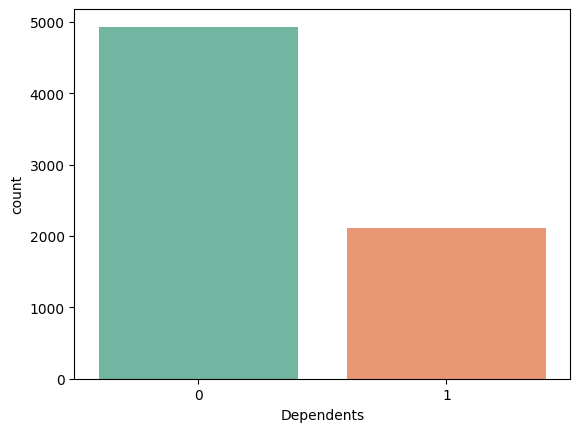

              PhoneService  Ratio
PhoneService                     
1                     6361 90.317
0                      682  9.683
##########################################


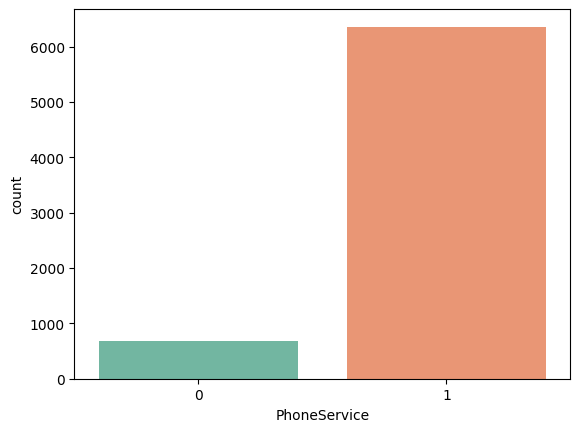

                 InternetService  Ratio
InternetService                        
1                           5517 78.333
0                           1526 21.667
##########################################


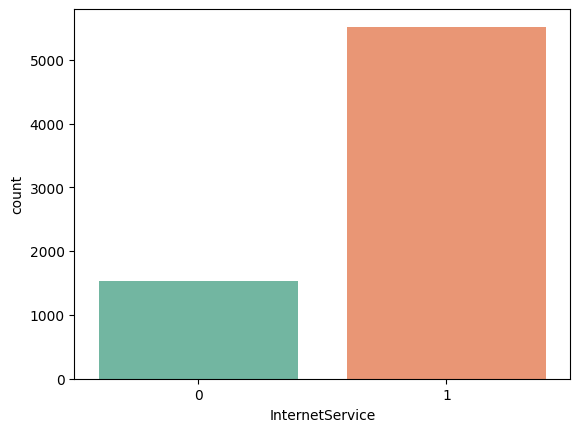

                  PaperlessBilling  Ratio
PaperlessBilling                         
1                             4171 59.222
0                             2872 40.778
##########################################


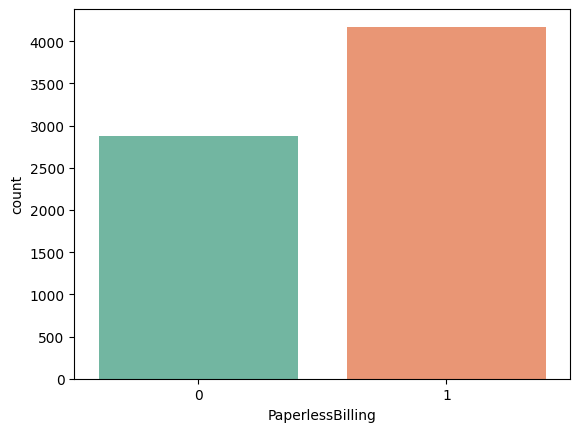

In [22]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

# **7. Analysis of Numerical Variables**

In [23]:
def num_summary(dataframe, col_name, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        sns.histplot(data=dataframe, x=col_name, bins=20, kde=True, color="blue")
        plt.show(block=True)

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


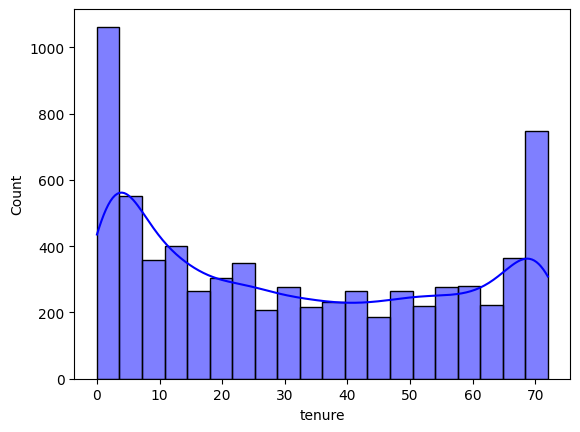

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


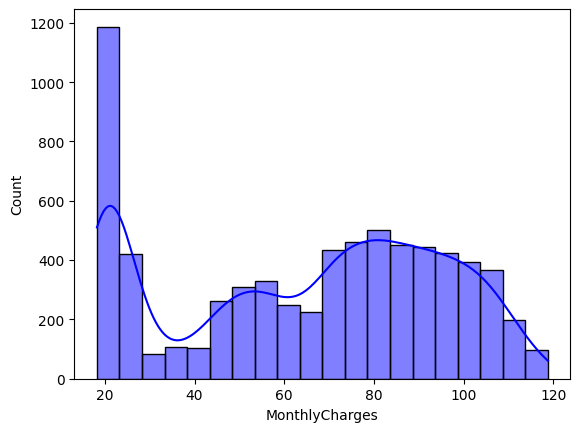

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


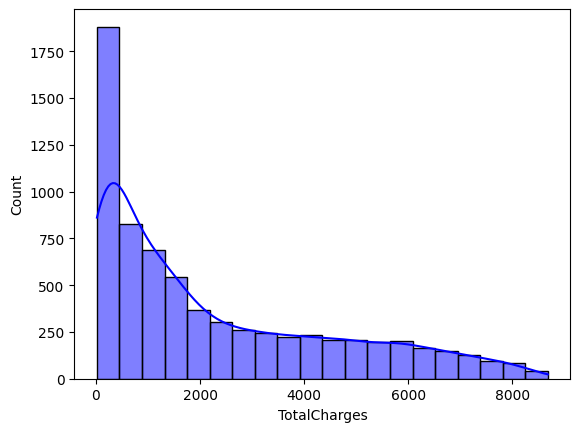

In [24]:
for col in num_cols:
    num_summary(df, col, plot=True)

# **8. Analysis of Categorical Variables by Target**

In [25]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe, palette="Set2")
        plt.show(block=True)

In [26]:
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col, plot=False)

        TARGET_MEAN
gender             
Female        0.269
Male          0.262


                  TARGET_MEAN
MultipleLines                
No                      0.250
No phone service        0.249
Yes                     0.286


                     TARGET_MEAN
OnlineSecurity                  
No                         0.418
No internet service        0.074
Yes                        0.146


                     TARGET_MEAN
OnlineBackup                    
No                         0.399
No internet service        0.074
Yes                        0.215


                     TARGET_MEAN
DeviceProtection                
No                         0.391
No internet service        0.074
Yes                        0.225


                     TARGET_MEAN
TechSupport                     
No                         0.416
No internet service        0.074
Yes                        0.152


                     TARGET_MEAN
StreamingTV                     
No                         0.335

# **9. Analysis of Numeric Variables by Target**

In [27]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [28]:
for col in num_cols:
    target_summary_with_num(df, "Churn", col, plot=False)

       tenure_mean
Churn             
0           37.570
1           17.979


       MonthlyCharges_mean
Churn                     
0                   61.265
1                   74.441


       TotalCharges_mean
Churn                   
0               2555.344
1               1531.796




# **10. Correlation Analysis**

In [29]:
corr = df[num_cols].corr()

In [30]:
corr

tenure  MonthlyCharges  TotalCharges
tenure           1.000           0.248         0.826
MonthlyCharges   0.248           1.000         0.651
TotalCharges     0.826           0.651         1.000

In [31]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    # Only numerical columns
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Correlation matrix
    corr = numeric_df.corr()
    cor_matrix = corr.abs()

    # Select upper triangular matrix (to remove unnecessary repetitions)
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

    # Let's select the column pairs whose correlation is higher than the threshold
    high_corrs = [(col, row)
                  for col in cor_matrix.columns
                  for row in cor_matrix.index
                  if not pd.isna(upper_triangle_matrix.loc[row, col]) and abs(
            upper_triangle_matrix.loc[row, col]) > corr_th]

    if plot:
        # Heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")
        plt.title("Correlation Heat Map")
        plt.show()

    return high_corrs

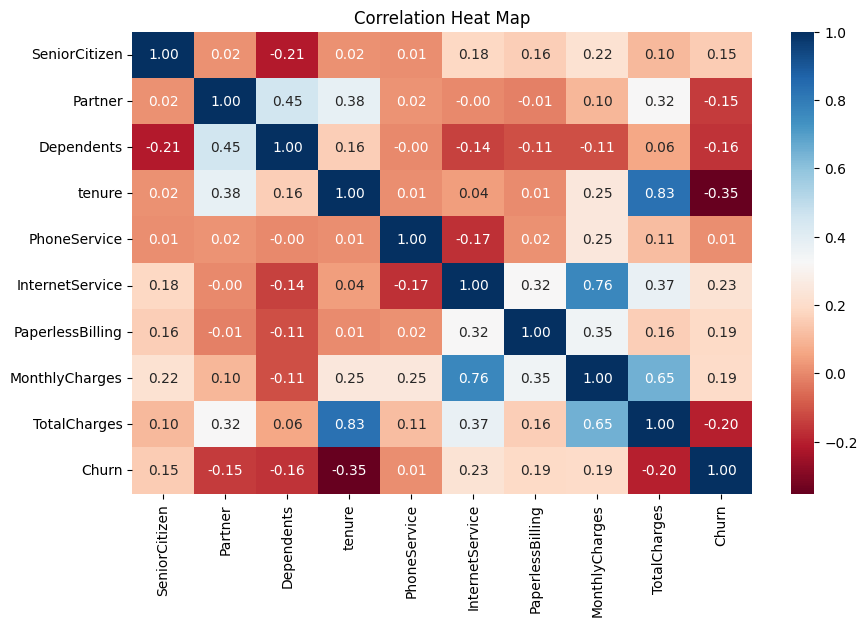

[('MonthlyCharges', 'InternetService'), ('TotalCharges', 'tenure')]

In [32]:
high_correlated_cols(df, plot=True)

# **11. Distribution of the Dependent Variable**

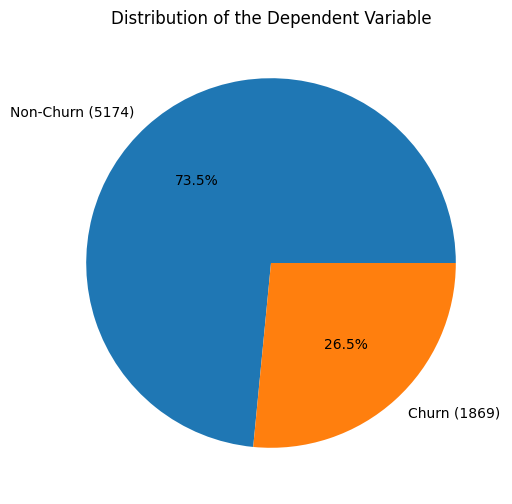

In [33]:
# Calculate the counts of each outcome
outcome_counts = df['Churn'].value_counts()

# Calculate the total number of patients
total_patients = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_patients * 100

# Create labels with both quantity and percentage
labels = [f'Non-Churn ({outcome_counts[0]})',
          f'Churn ({outcome_counts[1]})']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of the Dependent Variable')
plt.show()

# **12. Examining the Logarithm of the Dependent Variable**

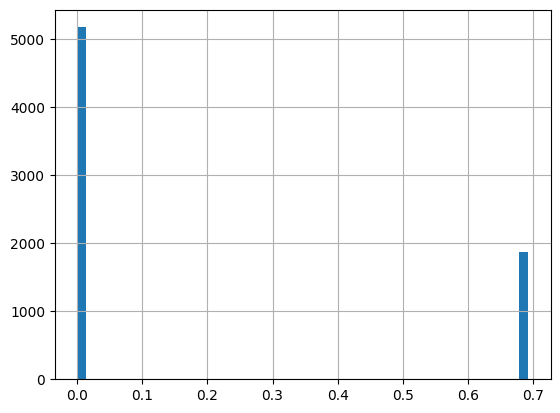

In [34]:
np.log1p(df['Churn']).hist(bins=50)
plt.show(block=True)

# **13. Feature Engineering**

* **Missing Values Detection**
* **Outlier Detection (Outliers)**
* **Feature Extraction**

# **14. Missing Value Analysis**

In [35]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
                    ..
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Length: 21, dtype: int64

In [36]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [37]:
na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11  0.160


In [38]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [39]:
missing_vs_target(df, "Churn", na_columns)

                      TARGET_MEAN  Count
TotalCharges_NA_FLAG                    
0                           0.266   7032
1                           0.000     11




In [40]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [41]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
                   ..
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Length: 21, dtype: int64

# **15. Outlier Analysis**

In [42]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [43]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [44]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


# **16. Base Model**

In [45]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]

In [46]:
# One-Hot-Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [47]:
dff = one_hot_encoder(dff, cat_cols)

In [48]:
dff.head()

customerID  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0  7590-VHVEG       1          29.850        29.850      0           True   
1  5575-GNVDE      34          56.950      1889.500      0          False   
2  3668-QPYBK       2          53.850       108.150      1          False   
3  7795-CFOCW      45          42.300      1840.750      0          False   
4  9237-HQITU       2          70.700       151.650      1           True   

   gender_Male  MultipleLines_No  MultipleLines_No phone service  \
0        False             False                            True   
1         True              True                           False   
2         True              True                           False   
3         True             False                            True   
4        False              True                           False   

   MultipleLines_Yes  OnlineSecurity_No  OnlineSecurity_No internet service  \
0              False               True                               False   
1              False              False                               False   
2              False              False                               False   
3              False              False                               False   
4              False               True                               False   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0               False            False                             False   
1                True             True                             False   
2                True            False                             False   
3                True             True                             False   
4               False             True                             False   

   OnlineBackup_Yes  DeviceProtection_No  \
0              True                 True   
1             False                False   
2              True                 True   
3             False                False   
4             False                 True   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                 False                 False            True   
1                                 False                  True            True   
2                                 False                 False            True   
3                                 False                  True           False   
4                                 False                 False            True   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                            False            False            True   
1                            False            False            True   
2                            False            False            True   
3                            False             True            True   
4                            False            False            True   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                            False            False                True   
1                            False            False                True   
2                            False            False                True   
3                            False            False                True   
4                            False            False                True   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                     True              False              False   
1                    False               True         

In [49]:
# Standardization

scaler = RobustScaler()

In [50]:
dff[num_cols] = scaler.fit_transform(dff[num_cols])

In [51]:
dff.head()

customerID  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0  7590-VHVEG  -0.609          -0.745        -0.405      0           True   
1  5575-GNVDE   0.109          -0.247         0.144      0          False   
2  3668-QPYBK  -0.587          -0.304        -0.382      1          False   
3  7795-CFOCW   0.348          -0.516         0.130      0          False   
4  9237-HQITU  -0.587           0.006        -0.369      1           True   

   gender_Male  MultipleLines_No  MultipleLines_No phone service  \
0        False             False                            True   
1         True              True                           False   
2         True              True                           False   
3         True             False                            True   
4        False              True                           False   

   MultipleLines_Yes  OnlineSecurity_No  OnlineSecurity_No internet service  \
0              False               True                               False   
1              False              False                               False   
2              False              False                               False   
3              False              False                               False   
4              False               True                               False   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0               False            False                             False   
1                True             True                             False   
2                True            False                             False   
3                True             True                             False   
4               False             True                             False   

   OnlineBackup_Yes  DeviceProtection_No  \
0              True                 True   
1             False                False   
2              True                 True   
3             False                False   
4             False                 True   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                 False                 False            True   
1                                 False                  True            True   
2                                 False                 False            True   
3                                 False                  True           False   
4                                 False                 False            True   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                            False            False            True   
1                            False            False            True   
2                            False            False            True   
3                            False             True            True   
4                            False            False            True   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                            False            False                True   
1                            False            False                True   
2                            False            False                True   
3                            False            False                True   
4                            False            False                True   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                     True              False              False   
1                    False               True         

In [52]:
# Creating the Dependent Variable.

y = dff["Churn"]
# Creating Independent Variables.

X = dff.drop(["Churn", "customerID"], axis=1)

In [53]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(verbose=-1, random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

base_models_metrics = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)

    base_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

########## LR ##########
Accuracy: 0.8032
AUC: 0.845
Recall: 0.55
Precision: 0.6536
F1: 0.5972


  File "C:\Users\OZ_Ailesi\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\OZ_Ailesi\AppData\Local\anaconda3\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\OZ_Ailesi\AppData\Local\anaconda3\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\OZ_Ailesi\AppData\Local\anaconda3\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


########## KNN ##########
Accuracy: 0.7622
AUC: 0.7754
Recall: 0.5297
Precision: 0.5547
F1: 0.5418
########## CART ##########
Accuracy: 0.7272
AUC: 0.6519
Recall: 0.489
Precision: 0.486
F1: 0.4871
########## RF ##########
Accuracy: 0.7877
AUC: 0.815
Recall: 0.4692
Precision: 0.6368
F1: 0.54
########## XGB ##########
Accuracy: 0.7846
AUC: 0.8215
Recall: 0.5126
Precision: 0.6134
F1: 0.5583
########## LightGBM ##########
Accuracy: 0.7961
AUC: 0.8354
Recall: 0.5201
Precision: 0.6443
F1: 0.5753
########## CatBoost ##########
Accuracy: 0.799
AUC: 0.8388
Recall: 0.5045
Precision: 0.6596
F1: 0.5715


# **17. Comparison of Metrics for Different Models Before Feature Engineering**

In [54]:
# Dictionary containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [base_models_metrics[0]['Accuracy'], base_models_metrics[1]['Accuracy'],
                 base_models_metrics[2]['Accuracy'], base_models_metrics[3]['Accuracy'],
                 base_models_metrics[4]['Accuracy'], base_models_metrics[5]['Accuracy'],
                 base_models_metrics[6]['Accuracy']],
    "AUC": [base_models_metrics[0]['AUC'], base_models_metrics[1]['AUC'],
            base_models_metrics[2]['AUC'], base_models_metrics[3]['AUC'],
            base_models_metrics[4]['AUC'], base_models_metrics[5]['AUC'],
            base_models_metrics[6]['AUC']],
    "Recall": [base_models_metrics[0]['Recall'], base_models_metrics[1]['Recall'],
               base_models_metrics[2]['Recall'], base_models_metrics[3]['Recall'],
               base_models_metrics[4]['Recall'], base_models_metrics[5]['Recall'],
               base_models_metrics[6]['Recall']],
    "Precision": [base_models_metrics[0]['Precision'], base_models_metrics[1]['Precision'],
                  base_models_metrics[2]['Precision'], base_models_metrics[3]['Precision'],
                  base_models_metrics[4]['Precision'], base_models_metrics[5]['Precision'],
                  base_models_metrics[6]['Precision']],
    "F1": [base_models_metrics[0]['F1'], base_models_metrics[1]['F1'],
           base_models_metrics[2]['F1'], base_models_metrics[3]['F1'],
           base_models_metrics[4]['F1'], base_models_metrics[5]['F1'],
           base_models_metrics[6]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models Before Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

# **18. Feature Importance For Base Model**

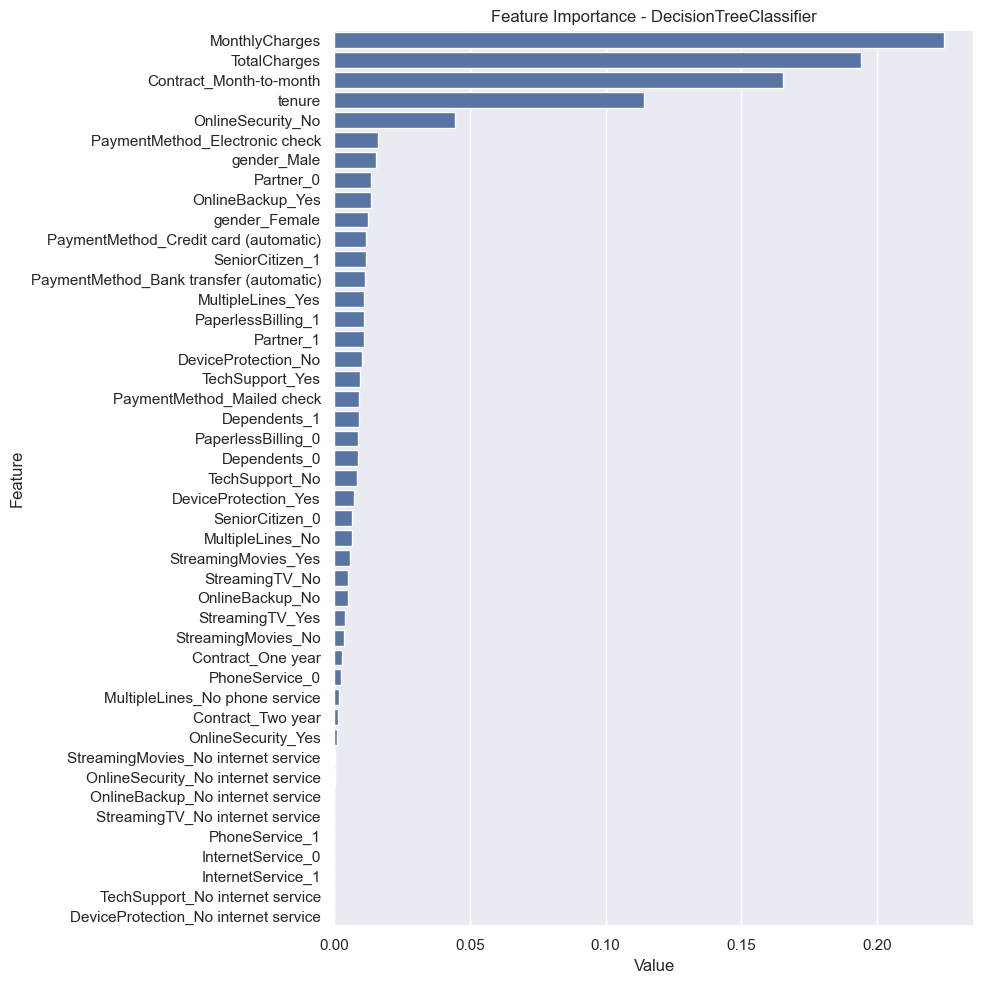

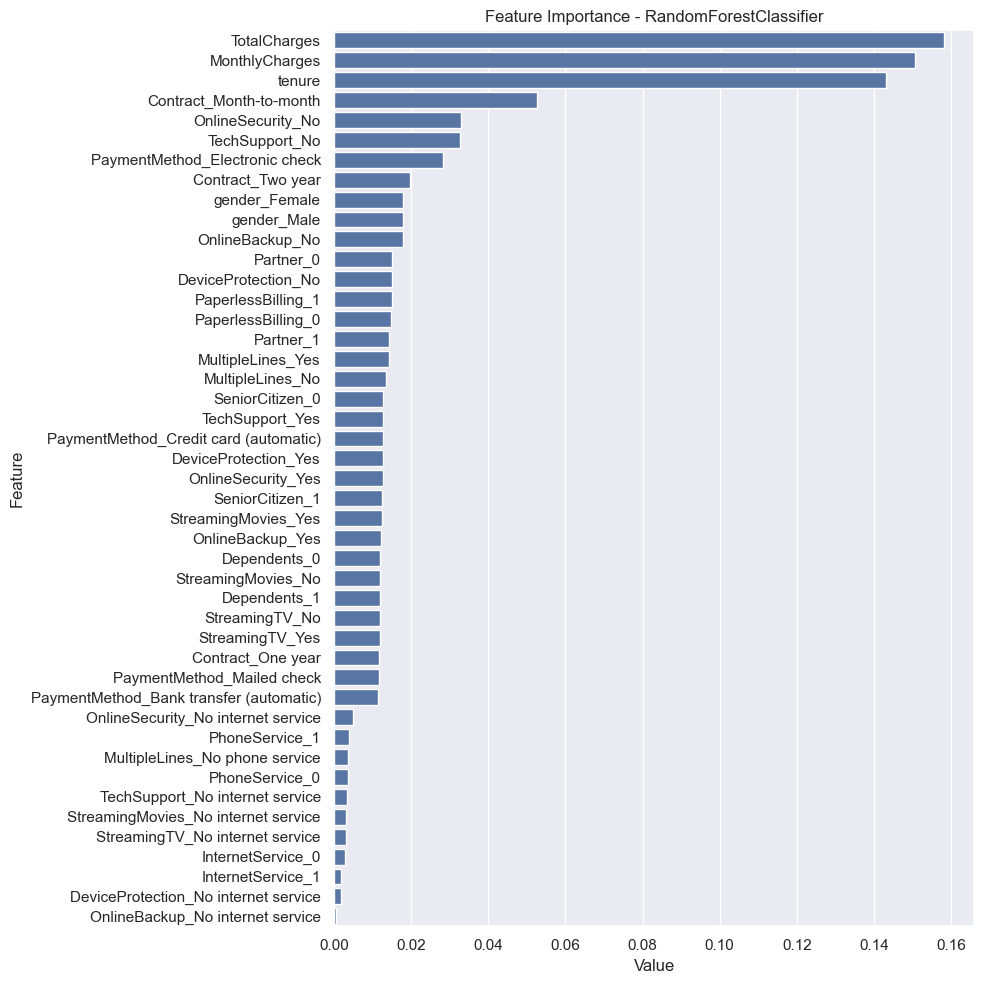

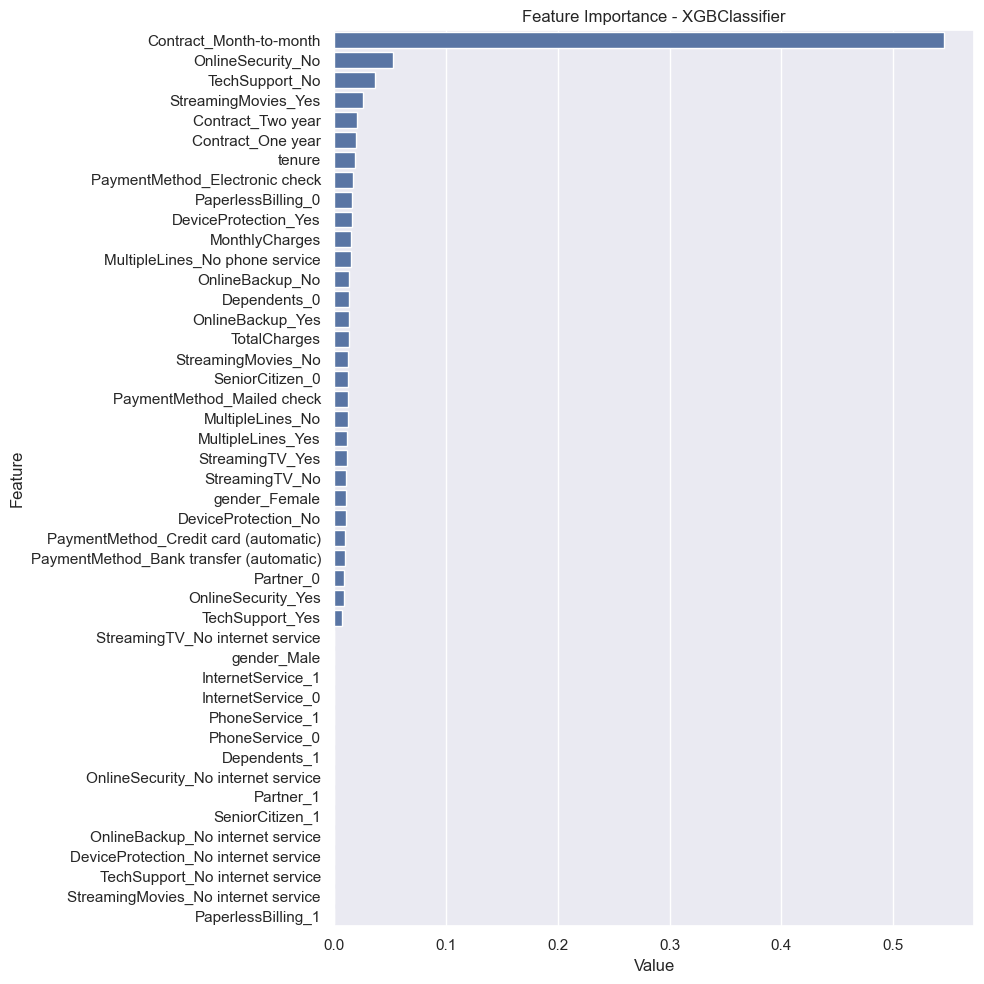

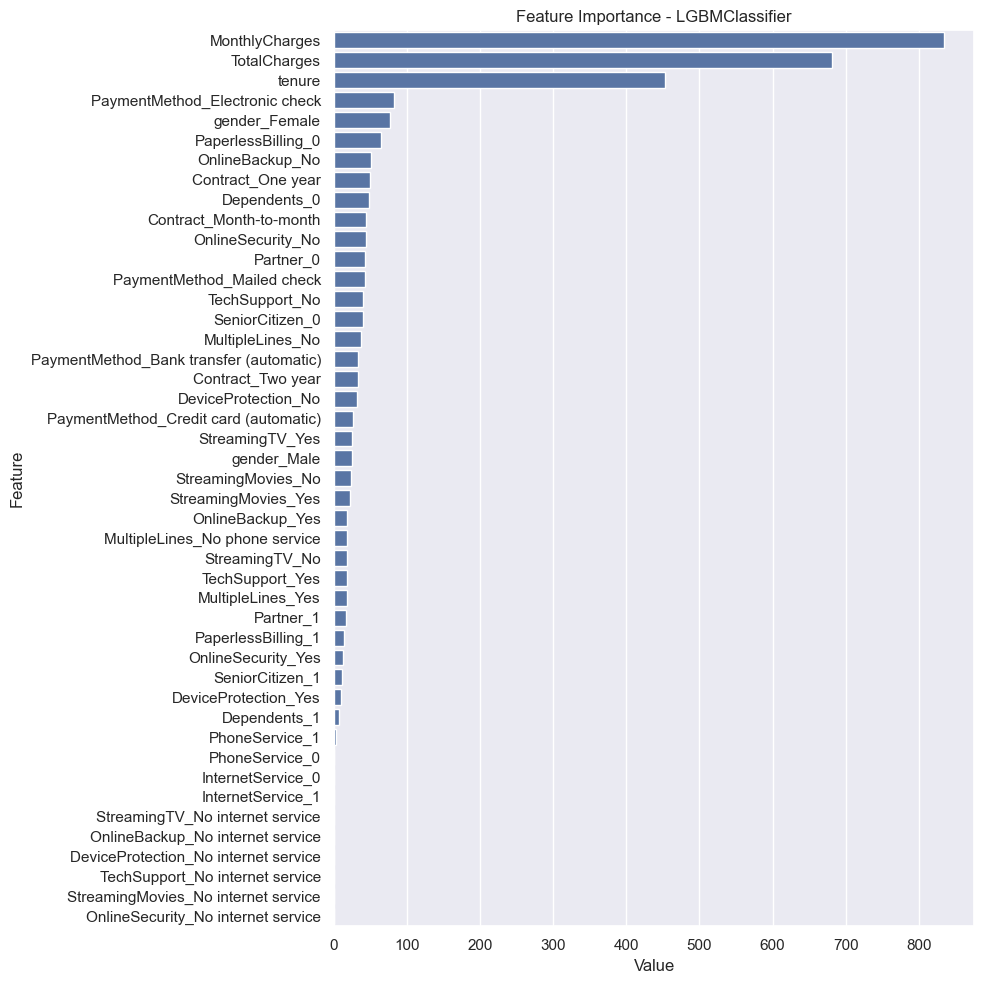

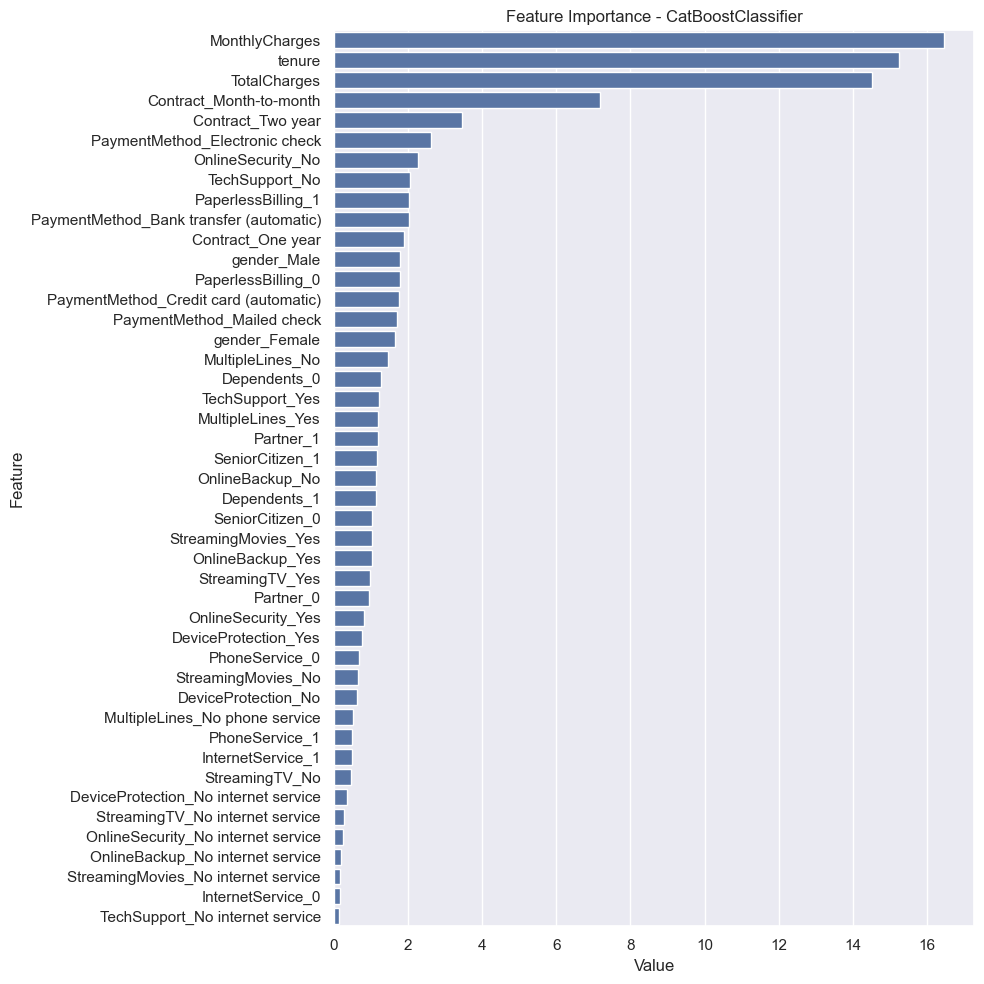

In [55]:
models = [DecisionTreeClassifier(random_state=12345),
         RandomForestClassifier(random_state=12345),
         XGBClassifier(random_state=12345),
         LGBMClassifier(verbose=-1, random_state=12345),
         CatBoostClassifier(verbose=False, random_state=12345)]

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

for model in models:
    model.fit(X, y)
    plot_importance(model, X)

# **19. Feature Extraction**

In [56]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ["0-1 Year", "1-2 Year", "2-3 Year", "3-4 Year", "4-5 Year", "5-6 Year"]
df["NEW_TENURE_YEAR"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=True)

In [57]:
df["NEW_Contract_Type"] = df["Contract"].apply(
    lambda x: 2 if x == "Two year" else (1 if x == "One year" else 0))

In [58]:
# Young customers with a monthly contract

df["NEW_Young_Not_Contract"] = df.apply(lambda x: 1 if (x["NEW_Contract_Type"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [59]:
df["NEW_Family_Size"] = df["Partner"] + df["Dependents"] + 1

In [60]:
# Total number of services received by the person

df['NEW_TotalServices'] = (df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1) \
                                        + df["InternetService"] + df["PhoneService"]

In [61]:
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if 
                                                       x in ["Bank transfer (automatic)","Credit card (automatic)"] 
                                                       else 0)

In [62]:
# average monthly payment

df["NEW_AVG_Charges"] = df["TotalCharges"] / df["tenure"]

In [63]:
df["NEW_AVG_Monthly_Charges"] = df["tenure"] / df["MonthlyCharges"]

In [64]:
# Increase in current price compared to average price

df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

In [65]:
# Fee per service

df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [66]:
# People who do not receive any support, backup or protection

df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [67]:
# People who receive any streaming service

df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [68]:
df.columns = [col.upper() for col in df.columns]

In [69]:
df.head()

CUSTOMERID  GENDER  SENIORCITIZEN  PARTNER  DEPENDENTS  TENURE  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PHONESERVICE     MULTIPLELINES  INTERNETSERVICE ONLINESECURITY  \
0             0  No phone service                1             No   
1             1                No                1            Yes   
2             1                No                1            Yes   
3             0  No phone service                1            Yes   
4             1                No                1             No   

  ONLINEBACKUP DEVICEPROTECTION TECHSUPPORT STREAMINGTV STREAMINGMOVIES  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

         CONTRACT  PAPERLESSBILLING              PAYMENTMETHOD  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MONTHLYCHARGES  TOTALCHARGES  CHURN NEW_TENURE_YEAR  NEW_CONTRACT_TYPE  \
0          29.850        29.850      0        0-1 Year                  0   
1          56.950      1889.500      0        2-3 Year                  1   
2          53.850       108.150      1        0-1 Year                  0   
3          42.300      1840.750      0        3-4 Year                  1   
4          70.700       151.650      1        0-1 Year                  0   

   NEW_YOUNG_NOT_CONTRACT  NEW_FAMILY_SIZE  NEW_TOTALSERVICES  \
0                       1                2                  2   
1                       0                1                  4   
2                       1                1                  4   
3                       0                1                  4   
4                       1                1                  2   

   NEW_FLAG_AUTOPAYMENT  NEW_AVG_CHARGES  NEW_AVG_MONTHLY_CHARGES  \
0                     0           29.850                    0.034   
1                     0           55.574                    0.597   
2                     0           54.075                    0.037   
3                     1           40.906                    1.064   
4                     0           75.825                    0.028   

   NEW_INCREASE  NEW_AVG_SERVICE_FEE  NEW_NOPROT  NEW_FLAG_ANY_STREAMING  
0         1.000                9.950           1                       0  
1         0.976               11.390           1                       0  
2         1.004               10.770           1                       0  
3         0.967                8.460           1                       0  
4         1.072               23.567           1                       0

# **20. ENCODING**

In [70]:
# Analysis of Variables.

def grab_col_names(dataframe, cat_th=10, car_th=23):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [71]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 33
cat_cols: 25
num_cols: 7
cat_but_car: 1
num_but_cat: 15


In [72]:
cat_cols

['GENDER',
 'MULTIPLELINES',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAYMENTMETHOD',
 'SENIORCITIZEN',
 'PARTNER',
 'DEPENDENTS',
 'PHONESERVICE',
 'INTERNETSERVICE',
 'PAPERLESSBILLING',
 'CHURN',
 'NEW_TENURE_YEAR',
 'NEW_CONTRACT_TYPE',
 'NEW_YOUNG_NOT_CONTRACT',
 'NEW_FAMILY_SIZE',
 'NEW_TOTALSERVICES',
 'NEW_FLAG_AUTOPAYMENT',
 'NEW_NOPROT',
 'NEW_FLAG_ANY_STREAMING']

In [73]:
num_cols

['TENURE',
 'MONTHLYCHARGES',
 'TOTALCHARGES',
 'NEW_AVG_CHARGES',
 'NEW_AVG_MONTHLY_CHARGES',
 'NEW_INCREASE',
 'NEW_AVG_SERVICE_FEE']

In [74]:
cat_but_car

['CUSTOMERID']

In [75]:
num_but_cat

['SENIORCITIZEN',
 'PARTNER',
 'DEPENDENTS',
 'PHONESERVICE',
 'INTERNETSERVICE',
 'PAPERLESSBILLING',
 'CHURN',
 'NEW_TENURE_YEAR',
 'NEW_CONTRACT_TYPE',
 'NEW_YOUNG_NOT_CONTRACT',
 'NEW_FAMILY_SIZE',
 'NEW_TOTALSERVICES',
 'NEW_FLAG_AUTOPAYMENT',
 'NEW_NOPROT',
 'NEW_FLAG_ANY_STREAMING']

In [76]:
df['NEW_TENURE_YEAR'].astype(str)

0       0-1 Year
1       2-3 Year
2       0-1 Year
3       3-4 Year
4       0-1 Year
          ...   
7038    1-2 Year
7039    5-6 Year
7040    0-1 Year
7041    0-1 Year
7042    5-6 Year
Name: NEW_TENURE_YEAR, Length: 7043, dtype: object

In [77]:
# Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [78]:
binary_cols2 = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [79]:
binary_cols2

['GENDER']

In [80]:
for col in binary_cols2:
    df = label_encoder(df, col)

In [81]:
# One-Hot Encoding

cat_cols = [col for col in cat_cols if col not in binary_cols2 and col not in ['SENIORCITIZEN',
 'PARTNER',
 'DEPENDENTS',
 'PHONESERVICE',
 'INTERNETSERVICE',
 'PAPERLESSBILLING',
 'CHURN',
 'NEW_CONTRACT_TYPE',
 'NEW_FAMILY_SIZE',
 'NEW_TOTALSERVICES',
 'NEW_FLAG_AUTOPAYMENT']]

In [82]:
cat_cols

['MULTIPLELINES',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAYMENTMETHOD',
 'NEW_TENURE_YEAR',
 'NEW_YOUNG_NOT_CONTRACT',
 'NEW_NOPROT',
 'NEW_FLAG_ANY_STREAMING']

In [83]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [84]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [85]:
df.head()

CUSTOMERID  GENDER  SENIORCITIZEN  PARTNER  DEPENDENTS  TENURE  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PHONESERVICE  INTERNETSERVICE  PAPERLESSBILLING  MONTHLYCHARGES  \
0             0                1                 1          29.850   
1             1                1                 0          56.950   
2             1                1                 1          53.850   
3             0                1                 0          42.300   
4             1                1                 1          70.700   

   TOTALCHARGES  CHURN  NEW_CONTRACT_TYPE  NEW_FAMILY_SIZE  NEW_TOTALSERVICES  \
0        29.850      0                  0                2                  2   
1      1889.500      0                  1                1                  4   
2       108.150      1                  0                1                  4   
3      1840.750      0                  1                1                  4   
4       151.650      1                  0                1                  2   

   NEW_FLAG_AUTOPAYMENT  NEW_AVG_CHARGES  NEW_AVG_MONTHLY_CHARGES  \
0                     0           29.850                    0.034   
1                     0           55.574                    0.597   
2                     0           54.075                    0.037   
3                     1           40.906                    1.064   
4                     0           75.825                    0.028   

   NEW_INCREASE  NEW_AVG_SERVICE_FEE  MULTIPLELINES_No phone service  \
0         1.000                9.950                            True   
1         0.976               11.390                           False   
2         1.004               10.770                           False   
3         0.967                8.460                            True   
4         1.072               23.567                           False   

   MULTIPLELINES_Yes  ONLINESECURITY_No internet service  ONLINESECURITY_Yes  \
0              False                               False               False   
1              False                               False                True   
2              False                               False                True   
3              False                               False                True   
4              False                               False               False   

   ONLINEBACKUP_No internet service  ONLINEBACKUP_Yes  \
0                             False              True   
1                             False             False   
2                             False              True   
3                             False             False   
4                             False             False   

   DEVICEPROTECTION_No internet service  DEVICEPROTECTION_Yes  \
0                                 False                 False   
1                                 False                  True   
2                                 False                 False   
3                                 False                  True   
4                                 False                 False   

   TECHSUPPORT_No internet service  TECHSUPPORT_Yes  \
0                            False            False   
1                            False            False   
2                            False            False   
3                            False             True   
4                            False            False   

   STREAMINGTV_No internet service  STREAMINGTV_Yes  \
0                            False            False   
1                            False            False   
2                            False            False   
3                            False            False   
4          

# 20. Standardization Process

In [86]:
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], 0)

In [87]:
scaler = RobustScaler()

In [88]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [89]:
df.head()

CUSTOMERID  GENDER  SENIORCITIZEN  PARTNER  DEPENDENTS  TENURE  \
0  7590-VHVEG       0              0        1           0  -0.609   
1  5575-GNVDE       1              0        0           0   0.109   
2  3668-QPYBK       1              0        0           0  -0.587   
3  7795-CFOCW       1              0        0           0   0.348   
4  9237-HQITU       0              0        0           0  -0.587   

   PHONESERVICE  INTERNETSERVICE  PAPERLESSBILLING  MONTHLYCHARGES  \
0             0                1                 1          -0.745   
1             1                1                 0          -0.247   
2             1                1                 1          -0.304   
3             0                1                 0          -0.516   
4             1                1                 1           0.006   

   TOTALCHARGES  CHURN  NEW_CONTRACT_TYPE  NEW_FAMILY_SIZE  NEW_TOTALSERVICES  \
0        -0.405      0                  0                2                  2   
1         0.144      0                  1                1                  4   
2        -0.382      1                  0                1                  4   
3         0.130      0                  1                1                  4   
4        -0.369      1                  0                1                  2   

   NEW_FLAG_AUTOPAYMENT  NEW_AVG_CHARGES  NEW_AVG_MONTHLY_CHARGES  \
0                     0           -0.742                   -0.683   
1                     0           -0.270                    0.209   
2                     0           -0.298                   -0.677   
3                     1           -0.539                    0.948   
4                     0            0.101                   -0.691   

   NEW_INCREASE  NEW_AVG_SERVICE_FEE  MULTIPLELINES_No phone service  \
0         0.000               -0.458                            True   
1        -0.603               -0.221                           False   
2         0.104               -0.323                           False   
3        -0.823               -0.703                            True   
4         1.809                1.779                           False   

   MULTIPLELINES_Yes  ONLINESECURITY_No internet service  ONLINESECURITY_Yes  \
0              False                               False               False   
1              False                               False                True   
2              False                               False                True   
3              False                               False                True   
4              False                               False               False   

   ONLINEBACKUP_No internet service  ONLINEBACKUP_Yes  \
0                             False              True   
1                             False             False   
2                             False              True   
3                             False             False   
4                             False             False   

   DEVICEPROTECTION_No internet service  DEVICEPROTECTION_Yes  \
0                                 False                 False   
1                                 False                  True   
2                                 False                 False   
3                                 False                  True   
4                                 False                 False   

   TECHSUPPORT_No internet service  TECHSUPPORT_Yes  \
0                            False            False   
1                            False            False   
2                            False            False   
3                            False             True   
4                            False            False   

   STREAMINGTV_No internet service  STREAMINGTV_Yes  \
0                            False            False   
1                            False            False   
2                            False            False   
3                            False            False   
4          

In [90]:
# Creating the Dependent Variable.

y = df["CHURN"]

# Creating Independent Variables.

X = df.drop(["CHURN","CUSTOMERID"], axis=1)

In [91]:
from sklearn.model_selection import cross_validate, ShuffleSplit

# ShuffleSplit oluşturuyoruz: 5 sefer, her defasında test seti %20 olacak şekilde
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=12345)

models = [
    ('LR', LogisticRegression(random_state=12345)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=12345)),
    ('RF', RandomForestClassifier(random_state=12345)),
    ('XGB', XGBClassifier(random_state=12345)),
    ("LightGBM", LGBMClassifier(verbose=-1, random_state=12345)),
    ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))
]

last_models_metrics = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)

    last_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

########## LR ##########
Accuracy: 0.8016
AUC: 0.8408
Recall: 0.5273
Precision: 0.6484
F1: 0.5815
########## KNN ##########
Accuracy: 0.753
AUC: 0.773
Recall: 0.5232
Precision: 0.5279
F1: 0.5255
########## CART ##########
Accuracy: 0.7221
AUC: 0.6508
Recall: 0.4974
Precision: 0.4702
F1: 0.4834
########## RF ##########
Accuracy: 0.7899
AUC: 0.8195
Recall: 0.4897
Precision: 0.6261
F1: 0.5492
########## XGB ##########
Accuracy: 0.7818
AUC: 0.8163
Recall: 0.5114
Precision: 0.5967
F1: 0.5504
########## LightGBM ##########
Accuracy: 0.7925
AUC: 0.829
Recall: 0.5175
Precision: 0.6253
F1: 0.5659
########## CatBoost ##########
Accuracy: 0.7945
AUC: 0.8328
Recall: 0.518
Precision: 0.6303
F1: 0.5685


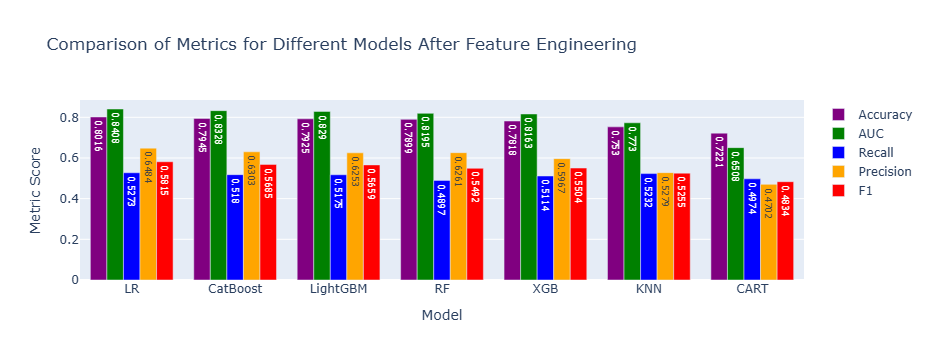

In [92]:
# Dictionary containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

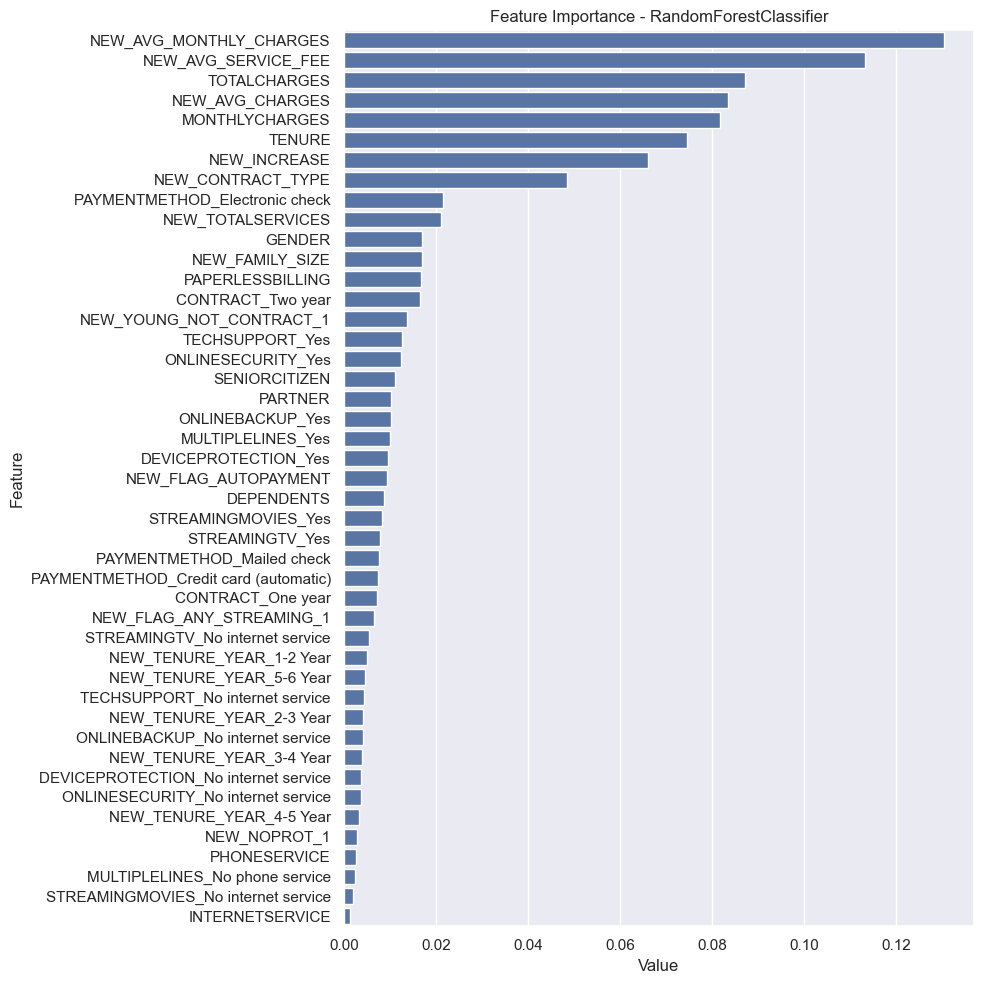

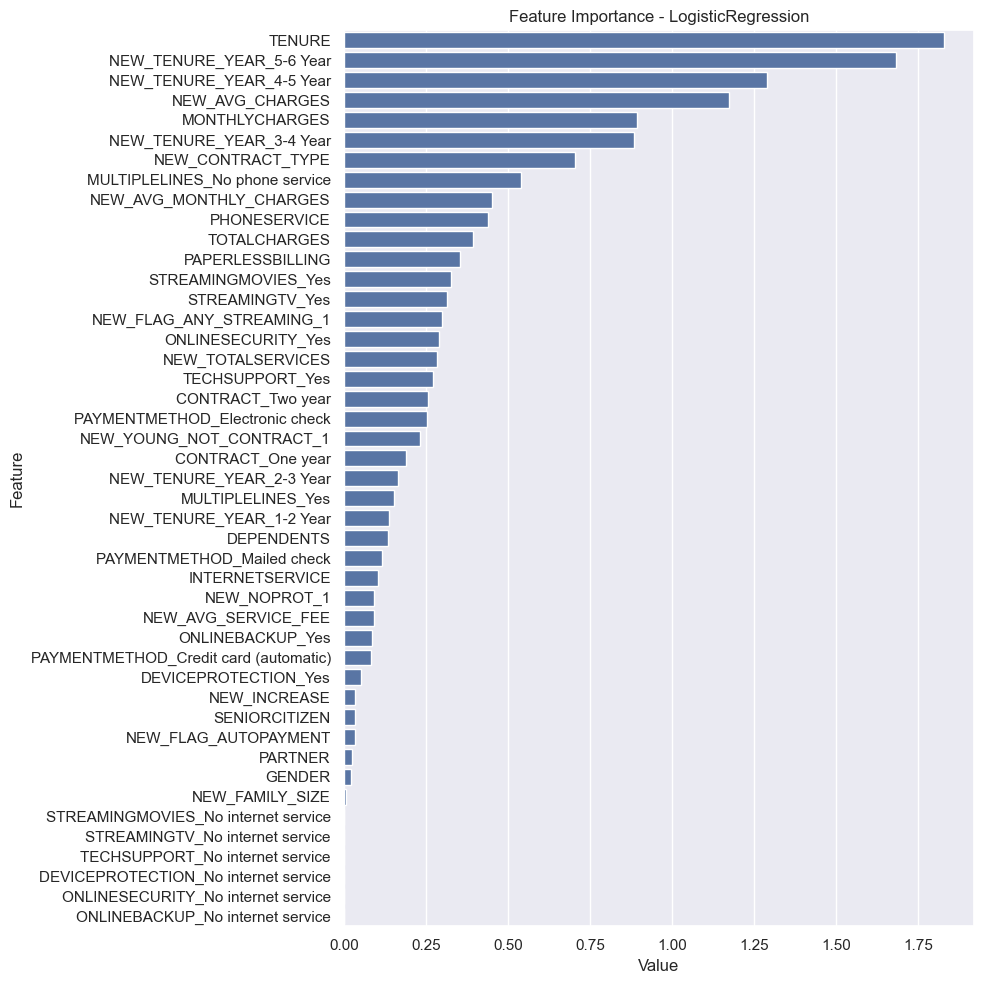

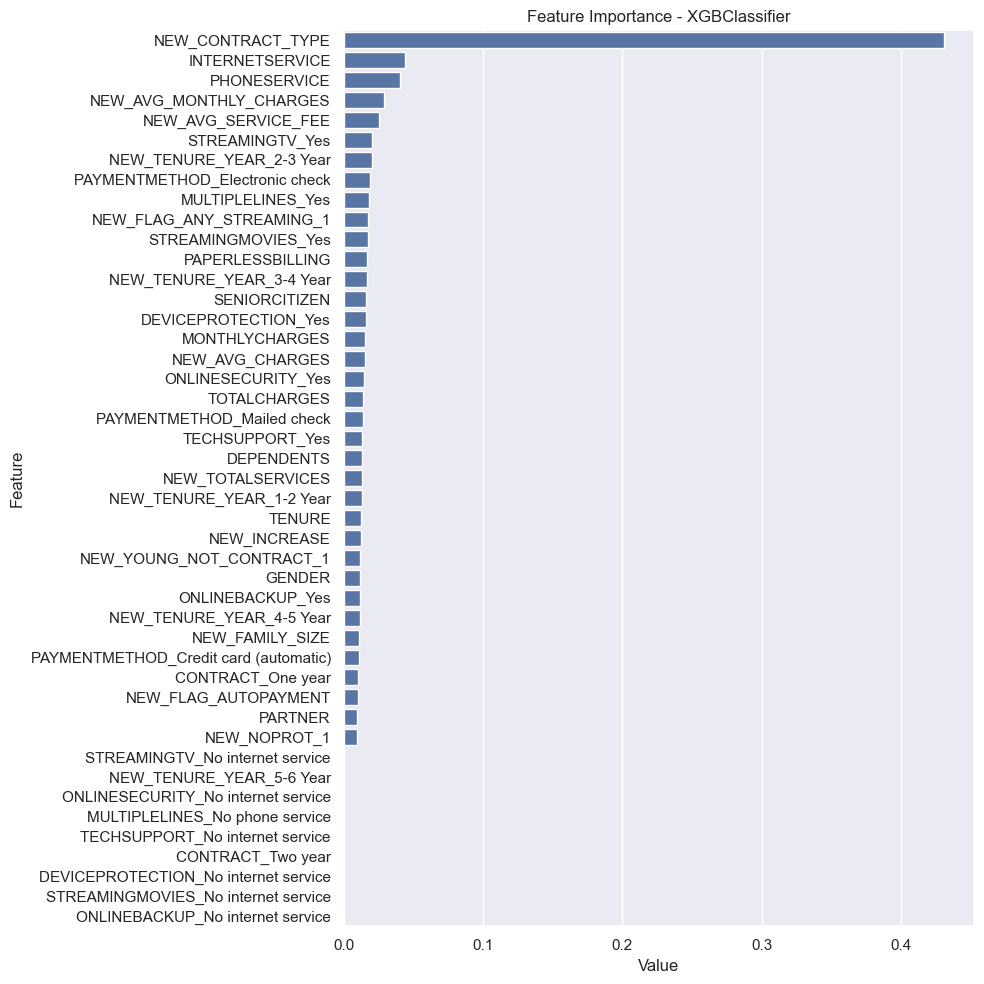

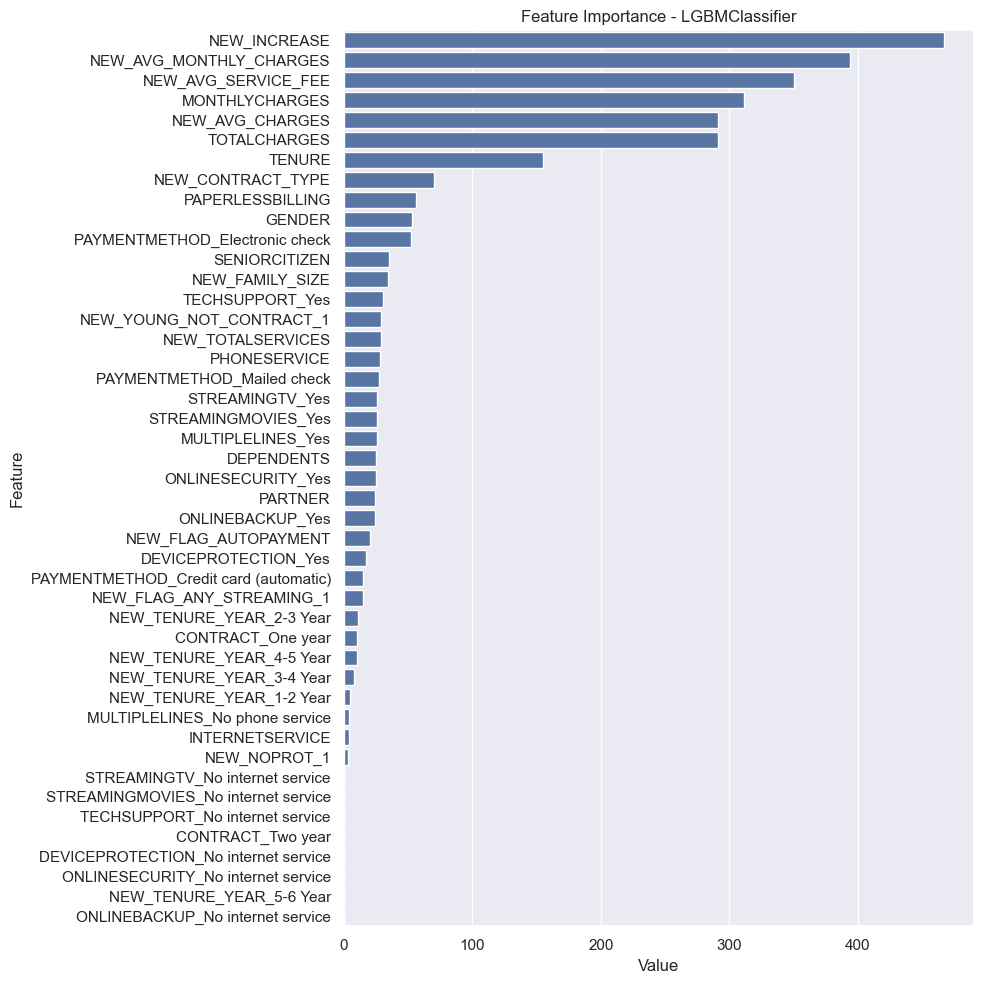

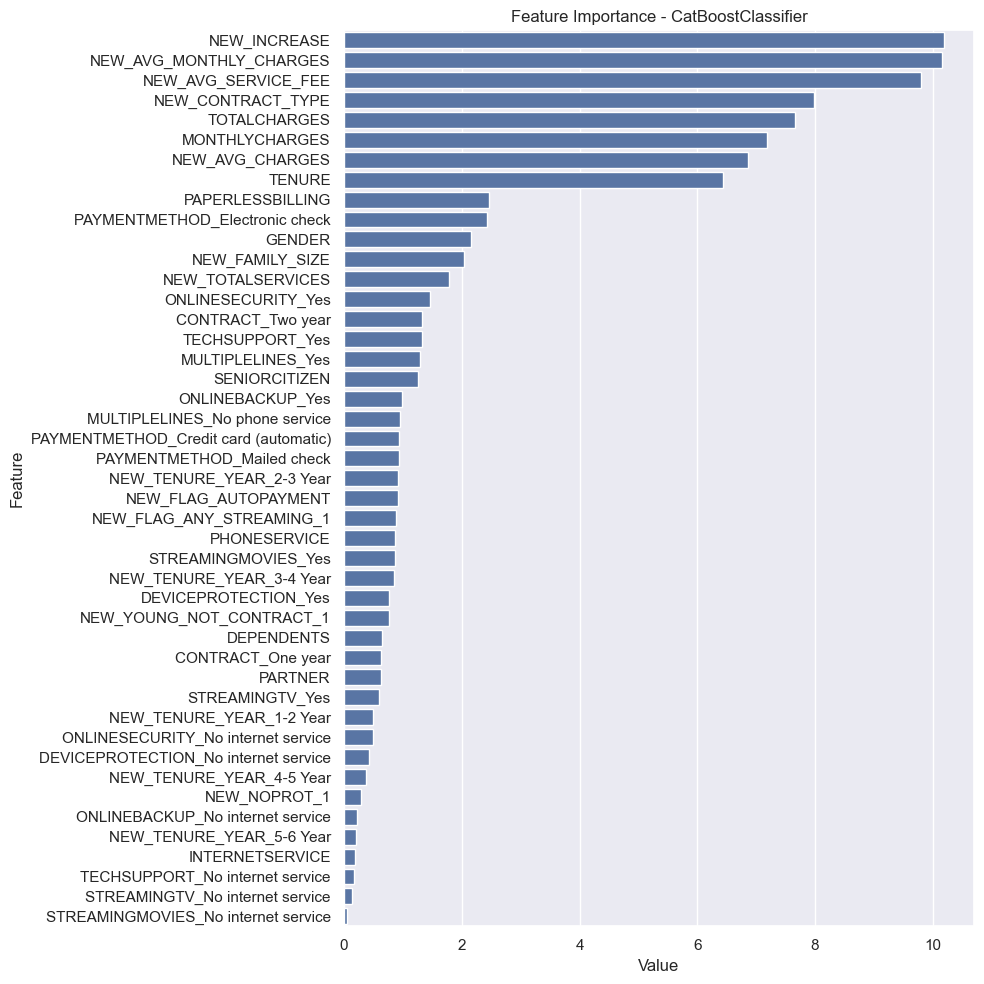

In [93]:
def plot_importance(model, features, num=None, save=False):
    # Plotlanacak özellik sayısını varsayılan olarak sütun sayısı olarak ayarla
    if num is None:
        num = len(features.columns)

    # Modelin feature importance özelliğini kontrol et
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # LogisticRegression gibi modeller için
        importances = model.coef_[0] if model.coef_.ndim == 2 else model.coef_
        importances = np.abs(importances)
    else:
        print(f"{model.__class__.__name__} modelinde özellik önem değerleri bulunamadı.")
        return

    feature_imp = pd.DataFrame({'Value': importances, 'Feature': features.columns})

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature",
                data=feature_imp.sort_values(by="Value", ascending=False).iloc[:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')
    plt.show()

# Örnek kullanım:
models = [RandomForestClassifier(),
          LogisticRegression(),
          XGBClassifier(),
          LGBMClassifier(),
          CatBoostClassifier(verbose=False, random_state=12345)
         ]

for model in models:
    model.fit(X, y)
    plot_importance(model, X)

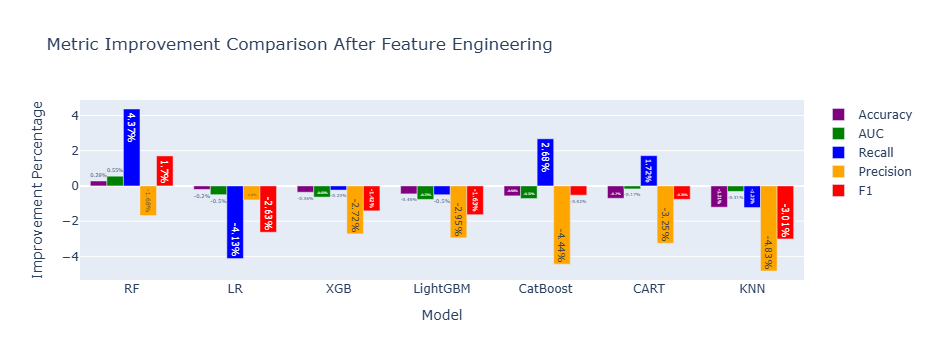

In [94]:
# Dictionary containing the updated metric results
base_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [base_models_metrics[0]['Accuracy'], base_models_metrics[1]['Accuracy'],
                 base_models_metrics[2]['Accuracy'], base_models_metrics[3]['Accuracy'],
                 base_models_metrics[4]['Accuracy'], base_models_metrics[5]['Accuracy'],
                 base_models_metrics[6]['Accuracy']],
    "AUC": [base_models_metrics[0]['AUC'], base_models_metrics[1]['AUC'],
            base_models_metrics[2]['AUC'], base_models_metrics[3]['AUC'],
            base_models_metrics[4]['AUC'], base_models_metrics[5]['AUC'],
            base_models_metrics[6]['AUC']],
    "Recall": [base_models_metrics[0]['Recall'], base_models_metrics[1]['Recall'],
               base_models_metrics[2]['Recall'], base_models_metrics[3]['Recall'],
               base_models_metrics[4]['Recall'], base_models_metrics[5]['Recall'],
               base_models_metrics[6]['Recall']],
    "Precision": [base_models_metrics[0]['Precision'], base_models_metrics[1]['Precision'],
                  base_models_metrics[2]['Precision'], base_models_metrics[3]['Precision'],
                  base_models_metrics[4]['Precision'], base_models_metrics[5]['Precision'],
                  base_models_metrics[6]['Precision']],
    "F1": [base_models_metrics[0]['F1'], base_models_metrics[1]['F1'],
           base_models_metrics[2]['F1'], base_models_metrics[3]['F1'],
           base_models_metrics[4]['F1'], base_models_metrics[5]['F1'],
           base_models_metrics[6]['F1']]
}

last_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1']]
}

# Creating DataFrames from the metric dictionaries
base_results_df = pd.DataFrame(base_metrics)
last_results_df = pd.DataFrame(last_metrics)

# Calculating the improvement percentages for each metric
improvement_df = pd.DataFrame()
improvement_df["Model"] = base_results_df["Model"]
improvement_df["Accuracy"] = ((last_results_df["Accuracy"] - base_results_df["Accuracy"]) / base_results_df["Accuracy"]) * 100
improvement_df["AUC"] = ((last_results_df["AUC"] - base_results_df["AUC"]) / base_results_df["AUC"]) * 100
improvement_df["Recall"] = ((last_results_df["Recall"] - base_results_df["Recall"]) / base_results_df["Recall"]) * 100
improvement_df["Precision"] = ((last_results_df["Precision"] - base_results_df["Precision"]) / base_results_df["Precision"]) * 100
improvement_df["F1"] = ((last_results_df["F1"] - base_results_df["F1"]) / base_results_df["F1"]) * 100

# Sorting the DataFrame by accuracy improvement in descending order
improvement_df = improvement_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=improvement_df["Model"],
        y=improvement_df[metric],
        marker_color=color,
        name=metric,
        text=improvement_df[metric].apply(lambda x: f"{round(x, 2)}%"),
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Improvement Percentage",
    title="Metric Improvement Comparison After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

# Train-Test ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=12345,
    stratify=y
)

# Hiperparametre listesi
lr_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knn_params = {"n_neighbors": [3, 5, 7]}
cart_params = {"max_depth": [3, 5, 7]}
rf_params = {"n_estimators": [100, 300, 500], "max_depth": [3, 5, 7]}
xgb_params = {"learning_rate": [0.01, 0.1], "max_depth": [3, 5, 7]}
catboost_params = {"iterations": [200, 500], "learning_rate": [0.01, 0.1], "depth": [3, 6]}
#lgbm_params = {'num_leaves': [31, 63], 'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]}

classifiers = [
    ("LR", LogisticRegression(random_state=12345), lr_params),
    ("KNN", KNeighborsClassifier(n_jobs=-1), knn_params),
    ("CART", DecisionTreeClassifier(random_state=12345), cart_params),
    ("RF", RandomForestClassifier(random_state=12345), rf_params),
    ("XGB", XGBClassifier(random_state=12345), xgb_params),
    #("LightGBM", LGBMClassifier(verbose=-1, random_state=12345), lgbm_params),  # Yeni eklenen
    ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345), catboost_params)
]

def hyperparameter_optimization(X_train, y_train, cv=5, scoring="accuracy"):
    print("Hiperparametre Optimizasyonu Başlıyor...\n")
    best_models = {}
    best_scores = {}

    # 2. Tüm modellerin tanımları (random_state'lerle birlikte)
    classifiers = [
        ("LR", LogisticRegression(random_state=12345), {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}),
        ("KNN", KNeighborsClassifier(n_jobs=-1), {"n_neighbors": [3, 5, 7]}),
        ("CART", DecisionTreeClassifier(random_state=12345), {"max_depth": [3, 5, 7]}),
        ("RF", RandomForestClassifier(random_state=12345, n_jobs=-1),
         {"n_estimators": [100, 300, 500], "max_depth": [3, 5, 7]}),
        ("XGB", XGBClassifier(random_state=12345, n_jobs=-1),
         {"learning_rate": [0.01, 0.1], "max_depth": [3, 5, 7]}),
        #("LightGBM", LGBMClassifier(random_state=12345, verbose=-1, n_jobs=-1), lgbm_params),
        ("CatBoost", CatBoostClassifier(random_state=12345, verbose=False),
         {"iterations": [200, 500], "learning_rate": [0.01, 0.1], "depth": [3, 6]})
    ]

    # 3. Cross-validation stratejisi
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=12345)

    for name, classifier, params in classifiers:
        print(f"\n########## {name} #########")

        try:
            # 4. Model klonlama (state temizliği için)
            base_model = clone(classifier)

            # 5. Optimizasyon öncesi performans
            cv_results = cross_validate(
                base_model,
                X_train,
                y_train,
                cv=skf,
                scoring=scoring,
                n_jobs=-1
            )
            initial_score = round(cv_results['test_score'].mean(), 4)
            print(f"{scoring} (Before): {initial_score}")

            # 6. Hiperparametre optimizasyonu
            gs_best = GridSearchCV(
                classifier,
                params,
                cv=skf,
                scoring=scoring,
                n_jobs=-1,
                verbose=0
            ).fit(X_train, y_train)

            # 7. Optimize edilmiş model
            best_score = round(gs_best.best_score_, 4)
            print(f"{scoring} (After) : {best_score}")
            print(f"Best params: {gs_best.best_params_}")

            best_models[name] = gs_best.best_estimator_
            best_scores[name] = best_score

        except Exception as e:
            print(f"{name} modelinde hata oluştu: {str(e)}")
            continue

    # 8. En iyi model seçimi
    if best_scores:
        best_model_name = max(best_scores, key=best_scores.get)
        print(f"\n🔍 En iyi model: {best_model_name} - {scoring}: {best_scores[best_model_name]}")
    else:
        raise ValueError("Hiçbir model başarıyla çalıştırılamadı")

    return best_models, best_model_name

In [96]:
# Fonksiyonu çağırdıktan sonra:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=12345,
    stratify=y
)
best_models, best_model_name = hyperparameter_optimization(
    X_train,
    y_train,
    cv=5,
    scoring="accuracy"  # İhtiyaca göre accuracy, roc_auc vb. kullanılabilir
)

best_model = best_models[best_model_name]
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Hiperparametre Optimizasyonu Başlıyor...


########## LR #########
accuracy (Before): 0.804
accuracy (After) : 0.8044
Best params: {'C': 1000}

########## KNN #########
accuracy (Before): 0.7614
accuracy (After) : 0.7687
Best params: {'n_neighbors': 7}

########## CART #########
accuracy (Before): 0.7299
accuracy (After) : 0.7902
Best params: {'max_depth': 3}

########## RF #########
accuracy (Before): 0.7941
accuracy (After) : 0.8024
Best params: {'max_depth': 7, 'n_estimators': 100}

########## XGB #########
accuracy (Before): 0.779
accuracy (After) : 0.8026
Best params: {'learning_rate': 0.1, 'max_depth': 3}

########## CatBoost #########
accuracy (Before): 0.7948
accuracy (After) : 0.8048
Best params: {'depth': 6, 'iterations': 500, 'learning_rate': 0.01}

🔍 En iyi model: CatBoost - accuracy: 0.8048
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy         

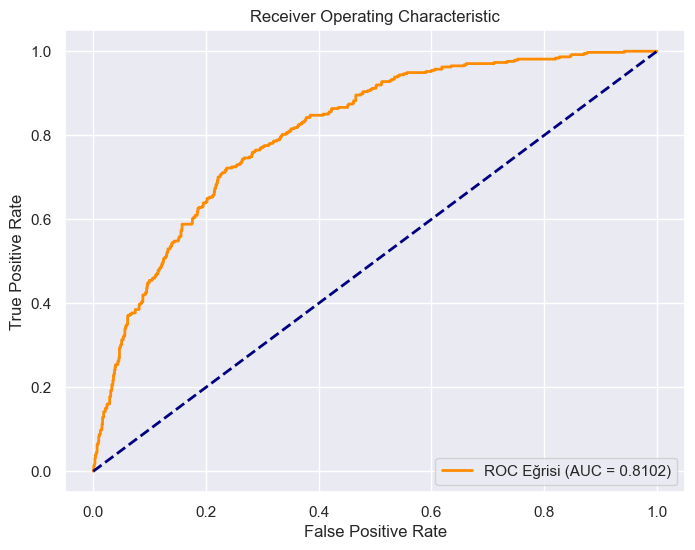

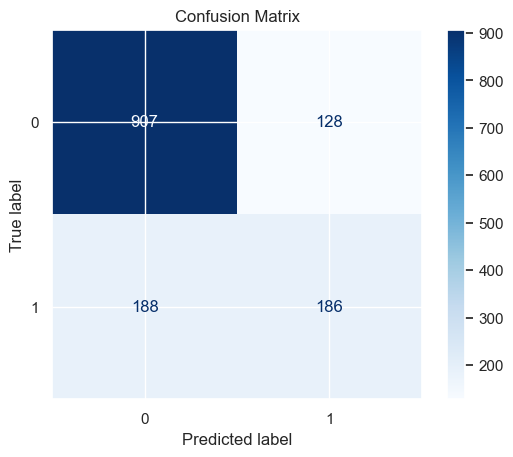

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.7757
Recall   : 0.4973
Precision: 0.5924
F1 Score : 0.5407
AUC      : 0.8102


In [108]:
from sklearn.metrics import roc_curve, auc as calc_auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Final modeli eğitim verileri ile tekrar eğitiyoruz (eğer daha önce fit etmediyseniz)
best_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_final_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf olasılıkları

# ROC Eğrisi için hesaplamalar
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = calc_auc(fpr, tpr)

# ROC Eğrisini çizdirme
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC Eğrisi (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Karışıklık Matrisi hesaplama ve çizdirme
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")

In [98]:
def high_correlated_cols2(dataframe, plot=False, corr_th=0.5):
    # Sadece sayısal sütunları seçelim
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Korelasyon matrisi oluştur
    corr = numeric_df.corr()

    # Üst üçgen matrisini seçelim (gereksiz tekrarları kaldırmak için)
    upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    # Korelasyonu eşikten yüksek (0.5'in üstü veya -0.5'in altı) olan sütun çiftlerini seçelim
    high_corrs = [(col, row, upper_triangle.loc[row, col])
                  for col in upper_triangle.columns
                  for row in upper_triangle.index
                  if not pd.isna(upper_triangle.loc[row, col]) and
                     (upper_triangle.loc[row, col] > corr_th or upper_triangle.loc[row, col] < -corr_th)]

    if plot:
        # Isı haritasını çiz
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")
        plt.title("Korelasyon Isı Haritası")
        plt.show()

    return high_corrs

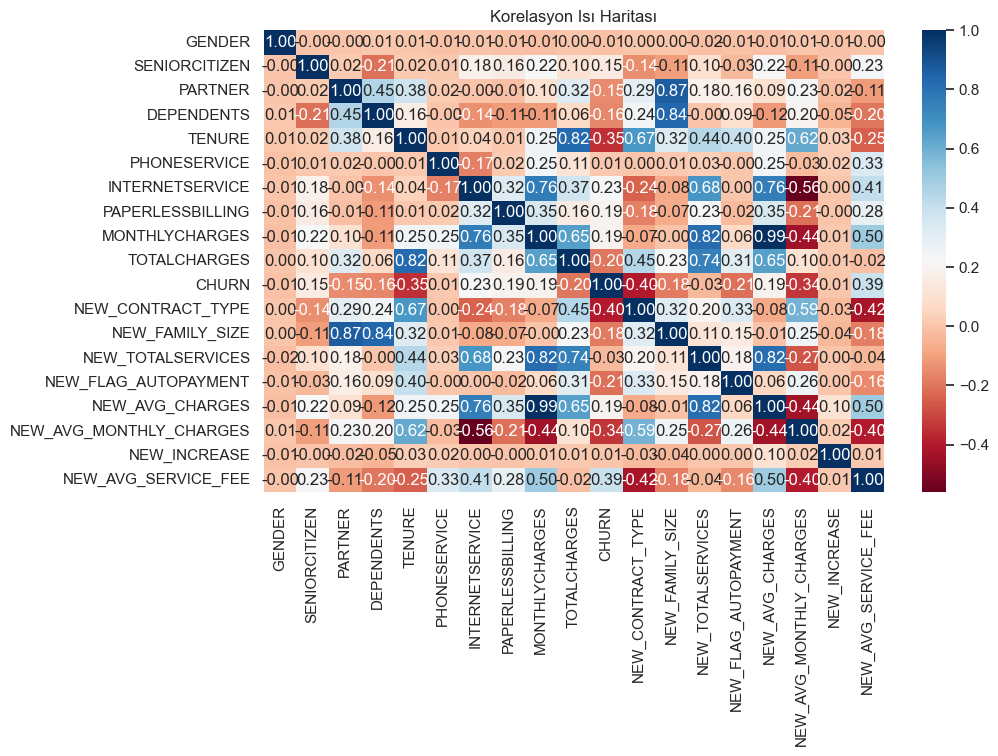

[('MONTHLYCHARGES', 'INTERNETSERVICE', 0.7635565582865704),
 ('TOTALCHARGES', 'TENURE', 0.8247573156351037),
 ('TOTALCHARGES', 'MONTHLYCHARGES', 0.6504680404415571),
 ('NEW_CONTRACT_TYPE', 'TENURE', 0.6716065492280586),
 ('NEW_FAMILY_SIZE', 'PARTNER', 0.8659046795267274),
 ('NEW_FAMILY_SIZE', 'DEPENDENTS', 0.8379983750395097),
 ('NEW_TOTALSERVICES', 'INTERNETSERVICE', 0.6822780705657443),
 ('NEW_TOTALSERVICES', 'MONTHLYCHARGES', 0.8221869906142466),
 ('NEW_TOTALSERVICES', 'TOTALCHARGES', 0.744996231240116),
 ('NEW_AVG_CHARGES', 'INTERNETSERVICE', 0.7584646845277363),
 ('NEW_AVG_CHARGES', 'MONTHLYCHARGES', 0.9943551749187908),
 ('NEW_AVG_CHARGES', 'TOTALCHARGES', 0.6485852134338764),
 ('NEW_AVG_CHARGES', 'NEW_TOTALSERVICES', 0.8168882988898635),
 ('NEW_AVG_MONTHLY_CHARGES', 'TENURE', 0.6184987330651989),
 ('NEW_AVG_MONTHLY_CHARGES', 'INTERNETSERVICE', -0.5613004799268496),
 ('NEW_AVG_MONTHLY_CHARGES', 'NEW_CONTRACT_TYPE', 0.5898436011216383),
 ('NEW_AVG_SERVICE_FEE', 'MONTHLYCHARGES', 0

In [99]:
high_correlated_cols2(df, plot=True, corr_th=0.5)

In [100]:
# Creating the Dependent Variable.

y = df["CHURN"]

# Creating Independent Variables.

X = df.drop(["CHURN","CUSTOMERID"], axis=1)

# Cross-validation stratejisi
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=12345)

# Model listesi
models = [
    ('LR', LogisticRegression(random_state=12345)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=12345)),
    ('RF', RandomForestClassifier(random_state=12345)),
    ('XGB', XGBClassifier(random_state=12345)),
    ("LightGBM", LGBMClassifier(verbose=-1, random_state=12345)),
    ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))
]

# İlk model metrikleri
initial_results = []

for name, model in models:
    cv_results = cross_validate(
        model, 
        X, 
        y, 
        cv=cv, 
        scoring=["accuracy", "f1", "roc_auc", "precision", "recall"],
        n_jobs=-1
    )
    
    metrics = {
        "Model": name,
        "Accuracy": round(cv_results['test_accuracy'].mean(), 4),
        "AUC": round(cv_results['test_roc_auc'].mean(), 4),
        "Recall": round(cv_results['test_recall'].mean(), 4),
        "Precision": round(cv_results['test_precision'].mean(), 4),
        "F1": round(cv_results['test_f1'].mean(), 4)
    }
    
    initial_results.append(metrics)
    print(f"{name} tamamlandı")

# Sonuçları DataFrame'e çevirme
initial_df = pd.DataFrame(initial_results)
print("\nİlk Model Performansları:")
print(initial_df.sort_values(by="Accuracy", ascending=False))

LR tamamlandı
KNN tamamlandı
CART tamamlandı
RF tamamlandı
XGB tamamlandı
LightGBM tamamlandı
CatBoost tamamlandı

İlk Model Performansları:
      Model  Accuracy   AUC  Recall  Precision    F1
0        LR     0.802 0.841   0.527      0.648 0.582
6  CatBoost     0.794 0.833   0.518      0.630 0.569
5  LightGBM     0.792 0.829   0.517      0.625 0.566
3        RF     0.790 0.820   0.490      0.626 0.549
4       XGB     0.782 0.816   0.511      0.597 0.550
1       KNN     0.753 0.773   0.523      0.528 0.525
2      CART     0.722 0.651   0.497      0.470 0.483


In [101]:
# Veriyi bölme
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=12345
)

# Gelişmiş hiperparametre grid'leri
param_grids = {
    "LR": {"C": [0.001, 0.01, 0.1, 1, 10, 100]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance']},
    "CART": {"max_depth": [3, 5, 7, None], "min_samples_split": [2, 5, 10]},
    "RF": {"n_estimators": [100, 200], "max_depth": [5, 7, None], "min_samples_leaf": [1, 2]},
    "XGB": {"learning_rate": [0.01, 0.1], "max_depth": [3, 5], "subsample": [0.8, 1.0]},
    "LightGBM": {"num_leaves": [31, 63], "learning_rate": [0.01, 0.1], "n_estimators": [100, 200]},
    "CatBoost": {"iterations": [500], "depth": [4, 6], "learning_rate": [0.03, 0.1]}
}

# Optimizasyon fonksiyonu
def optimize_and_evaluate(models, param_grids):
    optimized_results = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
    
    # DÜZELTME 1: models listesini doğru şekilde iterate et
    for model_info in models:
        name = model_info[0]
        model = model_info[1]
        
        print(f"\n⏳ {name} Optimizasyonu...")
        
        try:
            # DÜZELTME 2: Parametre grid'ini doğru şekilde al
            if name not in param_grids:
                raise ValueError(f"{name} için parametre gridi tanımlı değil")
                
            gs = GridSearchCV(
                estimator=model,
                param_grid=param_grids[name],
                cv=skf,
                scoring='accuracy',
                n_jobs=-1,
                verbose=0
            ).fit(X_train, y_train)
            
            final_model = gs.best_estimator_
            y_pred = final_model.predict(X_test)
            y_proba = final_model.predict_proba(X_test)[:,1] if hasattr(final_model, "predict_proba") else None
            
            metrics = {
                "Model": name,
                "Best Params": gs.best_params_,
                "Test Accuracy": round(accuracy_score(y_test, y_pred), 4),
                "Test AUC": round(roc_auc_score(y_test, y_proba), 4) if y_proba is not None else "N/A",
                "Test F1": round(f1_score(y_test, y_pred), 4),
                "Test Precision": round(precision_score(y_test, y_pred), 4),
                "Test Recall": round(recall_score(y_test, y_pred), 4)
            }
            
            optimized_results.append(metrics)
            print(f"✅ {name} tamamlandı | En iyi accuracy: {metrics['Test Accuracy']}")
            
        except Exception as e:
            print(f"❌ {name} hatası: {str(e)}")
            continue
    
    return pd.DataFrame(optimized_results)

# DÜZELTME 3: Model isimlerini parametre grid'leriyle eşleştir
param_grids = {
    "LR": {"C": [0.001, 0.01, 0.1, 1, 10, 100]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance']},
    "CART": {"max_depth": [3, 5, 7, None], "min_samples_split": [2, 5, 10]},
    "RF": {"n_estimators": [100, 200], "max_depth": [5, 7, None], "min_samples_leaf": [1, 2]},
    "XGB": {"learning_rate": [0.01, 0.1], "max_depth": [3, 5], "subsample": [0.8, 1.0]},
    "LightGBM": {"num_leaves": [31, 63], "learning_rate": [0.01, 0.1], "n_estimators": [100, 200]},  # DÜZELTME 4: LightGBM anahtarını düzelt
    "CatBoost": {"iterations": [500], "depth": [4, 6], "learning_rate": [0.03, 0.1]}
}

# Model listesi (orijinal yapıyı koru)
models_to_optimize = [
    ("LR", LogisticRegression(random_state=12345, max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("CART", DecisionTreeClassifier(random_state=12345)),
    ("RF", RandomForestClassifier(random_state=12345, n_jobs=-1)),
    ("XGB", XGBClassifier(random_state=12345, n_jobs=-1)),
    ("LightGBM", LGBMClassifier(random_state=12345, verbose=-1, n_jobs=-1)),  # DÜZELTME 5: İsim tutarlılığı
    ("CatBoost", CatBoostClassifier(random_state=12345, verbose=False))
]

# Çağırma şeklini düzelt
optimized_df = optimize_and_evaluate(
    models=models_to_optimize,  # DÜZELTME 6: Direkt liste gönder
    param_grids=param_grids
)


⏳ LR Optimizasyonu...
✅ LR tamamlandı | En iyi accuracy: 0.7991

⏳ KNN Optimizasyonu...
✅ KNN tamamlandı | En iyi accuracy: 0.7807

⏳ CART Optimizasyonu...
✅ CART tamamlandı | En iyi accuracy: 0.7693

⏳ RF Optimizasyonu...
✅ RF tamamlandı | En iyi accuracy: 0.7921

⏳ XGB Optimizasyonu...
✅ XGB tamamlandı | En iyi accuracy: 0.8034

⏳ LightGBM Optimizasyonu...
✅ LightGBM tamamlandı | En iyi accuracy: 0.7935

⏳ CatBoost Optimizasyonu...
✅ CatBoost tamamlandı | En iyi accuracy: 0.7999


In [102]:
print("\nKarşılaştırma:")
comparison = pd.merge(initial_df, optimized_df, on="Model")
comparison["Accuracy Artışı"] = comparison["Test Accuracy"] - comparison["Accuracy"]
print(comparison[["Model", "Accuracy", "Test Accuracy", "Accuracy Artışı"]].sort_values(by="Accuracy Artışı", ascending=False))


Karşılaştırma:
      Model  Accuracy  Test Accuracy  Accuracy Artışı
2      CART     0.722          0.769            0.047
1       KNN     0.753          0.781            0.028
4       XGB     0.782          0.803            0.022
6  CatBoost     0.794          0.800            0.005
3        RF     0.790          0.792            0.002
5  LightGBM     0.792          0.793            0.001
0        LR     0.802          0.799           -0.002


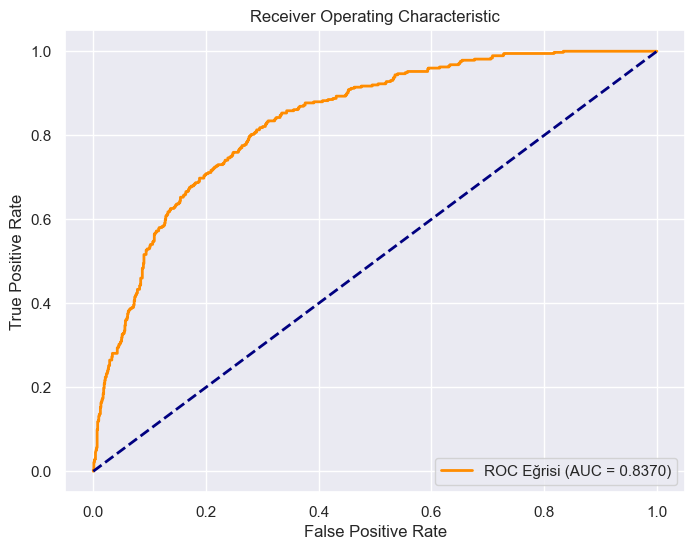

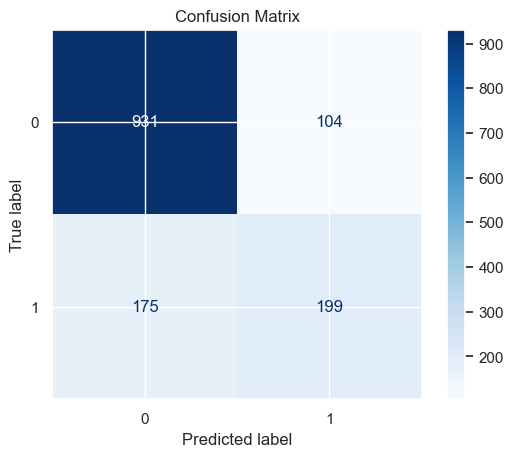

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.8020
Recall   : 0.5321
Precision: 0.6568
F1 Score : 0.5879
AUC      : 0.8370


In [103]:
from sklearn.metrics import roc_curve, auc as calc_auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Final modeli eğitim verileri ile tekrar eğitiyoruz (eğer daha önce fit etmediyseniz)
best_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_final_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf olasılıkları

# ROC Eğrisi için hesaplamalar
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = calc_auc(fpr, tpr)

# ROC Eğrisini çizdirme
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC Eğrisi (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Karışıklık Matrisi hesaplama ve çizdirme
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")

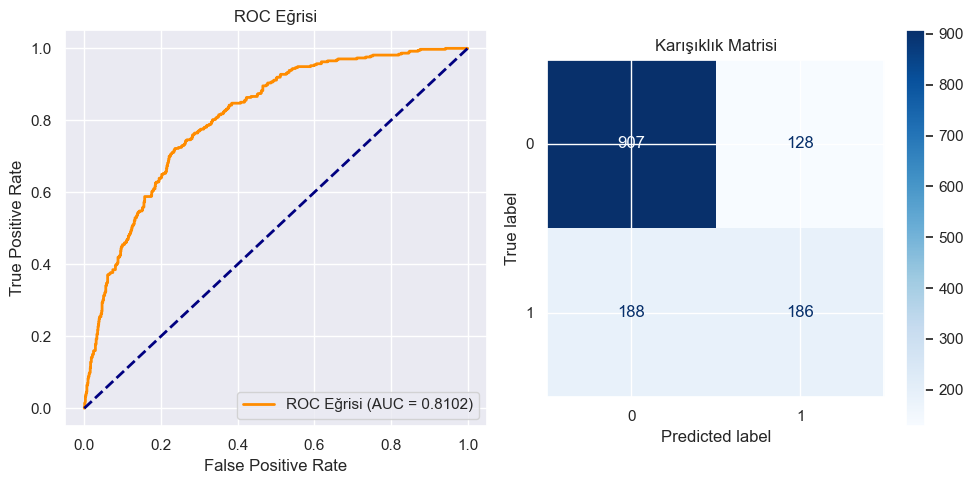

========= Final Model Performans Raporu ==========
Accuracy  : 0.7757
Recall    : 0.4973
Precision : 0.5924
F1        : 0.5407
AUC       : 0.8102


In [120]:
def evaluate_final_model(model, X_test, y_test):
    # Tahminler ve olasılıklar
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    # 1. ROC Eğrisi ve AUC
    plt.figure(figsize=(10, 5))
    
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = calc_auc(fpr, tpr)
        
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Eğrisi')
        plt.legend(loc="lower right")
    
    # 2. Confusion Matrix
    plt.subplot(1, 2, 2)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title('Karışıklık Matrisi')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Metrikler
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    
    print(" Final Model Performans Raporu ".center(50, "="))
    for metric, value in metrics.items():
        print(f"{metric:10}: {value:.4f}")

# En iyi modeli seçme (optimized_df'den)
best_model_name = optimized_df.loc[optimized_df['Test Accuracy'].idxmax(), 'Model']
best_model = [model for name, model in models_to_optimize if name == best_model_name][0]

# Modeli yeniden eğitmeye GEREK YOK (GridSearchCV otomatik fit eder)
# Doğrudan değerlendirme fonksiyonunu çağır
evaluate_final_model(best_model, X_test, y_test)

In [121]:
y = df["CHURN"]
X = df.drop(["CHURN","CUSTOMERID"], axis=1)

models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

last_models_metrics = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    
    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)
    
    last_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })
    
    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

########## LR ##########
Accuracy: 0.8036
AUC: 0.8469
Recall: 0.5238
Precision: 0.6656
F1: 0.5862
########## KNN ##########
Accuracy: 0.7605
AUC: 0.7818
Recall: 0.5308
Precision: 0.5505
F1: 0.5404
########## CART ##########
Accuracy: 0.7287
AUC: 0.6551
Recall: 0.4965
Precision: 0.4889
F1: 0.4927
########## RF ##########
Accuracy: 0.7894
AUC: 0.8254
Recall: 0.4858
Precision: 0.6352
F1: 0.5504
########## XGB ##########
Accuracy: 0.7839
AUC: 0.8214
Recall: 0.5078
Precision: 0.6121
F1: 0.555
########## LightGBM ##########
Accuracy: 0.7934
AUC: 0.8365
Recall: 0.5094
Precision: 0.6392
F1: 0.5668
########## CatBoost ##########
Accuracy: 0.7964
AUC: 0.8404
Recall: 0.5136
Precision: 0.6468
F1: 0.5725


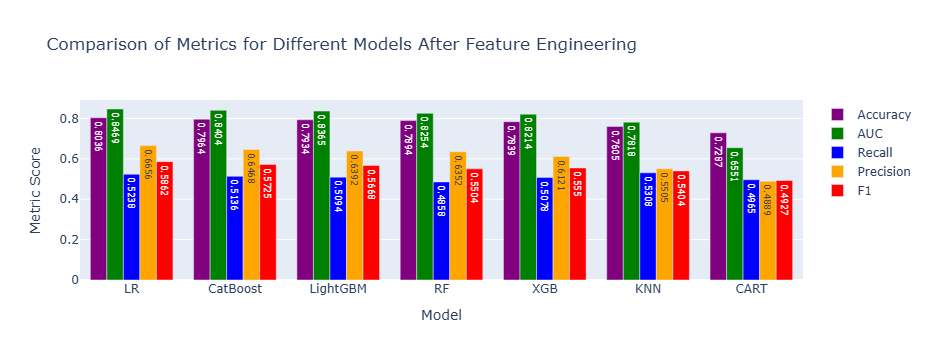

In [112]:
# Dictionary containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)


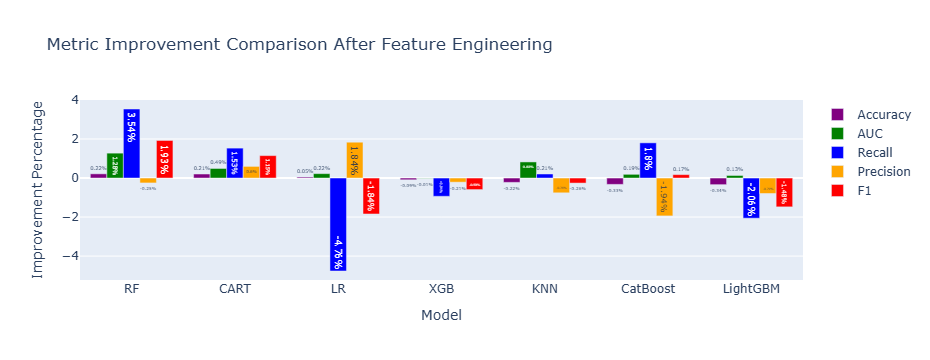

In [113]:
# Dictionary containing the updated metric results
base_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [base_models_metrics[0]['Accuracy'], base_models_metrics[1]['Accuracy'],
                 base_models_metrics[2]['Accuracy'], base_models_metrics[3]['Accuracy'],
                 base_models_metrics[4]['Accuracy'], base_models_metrics[5]['Accuracy'],
                 base_models_metrics[6]['Accuracy']],
    "AUC": [base_models_metrics[0]['AUC'], base_models_metrics[1]['AUC'],
            base_models_metrics[2]['AUC'], base_models_metrics[3]['AUC'],
            base_models_metrics[4]['AUC'], base_models_metrics[5]['AUC'],
            base_models_metrics[6]['AUC']],
    "Recall": [base_models_metrics[0]['Recall'], base_models_metrics[1]['Recall'],
               base_models_metrics[2]['Recall'], base_models_metrics[3]['Recall'],
               base_models_metrics[4]['Recall'], base_models_metrics[5]['Recall'],
               base_models_metrics[6]['Recall']],
    "Precision": [base_models_metrics[0]['Precision'], base_models_metrics[1]['Precision'],
                  base_models_metrics[2]['Precision'], base_models_metrics[3]['Precision'],
                  base_models_metrics[4]['Precision'], base_models_metrics[5]['Precision'],
                  base_models_metrics[6]['Precision']],
    "F1": [base_models_metrics[0]['F1'], base_models_metrics[1]['F1'],
           base_models_metrics[2]['F1'], base_models_metrics[3]['F1'],
           base_models_metrics[4]['F1'], base_models_metrics[5]['F1'],
           base_models_metrics[6]['F1']]
}

last_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1']]
}

# Creating DataFrames from the metric dictionaries
base_results_df = pd.DataFrame(base_metrics)
last_results_df = pd.DataFrame(last_metrics)

# Calculating the improvement percentages for each metric
improvement_df = pd.DataFrame()
improvement_df["Model"] = base_results_df["Model"]
improvement_df["Accuracy"] = ((last_results_df["Accuracy"] - base_results_df["Accuracy"]) / base_results_df["Accuracy"]) * 100
improvement_df["AUC"] = ((last_results_df["AUC"] - base_results_df["AUC"]) / base_results_df["AUC"]) * 100
improvement_df["Recall"] = ((last_results_df["Recall"] - base_results_df["Recall"]) / base_results_df["Recall"]) * 100
improvement_df["Precision"] = ((last_results_df["Precision"] - base_results_df["Precision"]) / base_results_df["Precision"]) * 100
improvement_df["F1"] = ((last_results_df["F1"] - base_results_df["F1"]) / base_results_df["F1"]) * 100

# Sorting the DataFrame by accuracy improvement in descending order
improvement_df = improvement_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=improvement_df["Model"],
        y=improvement_df[metric],
        marker_color=color,
        name=metric,
        text=improvement_df[metric].apply(lambda x: f"{round(x, 2)}%"),
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Improvement Percentage",
    title="Metric Improvement Comparison After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

In [124]:
lr_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knn_params = {"n_neighbors": [3, 5, 7]}
cart_params = {"max_depth": [3, 5, 7]}
rf_params = {"n_estimators": [100, 300, 500]}
xgb_params = {"learning_rate": [0.01, 0.1], "max_depth": [3, 5, 7]}
#lgbm_params = {"learning_rate": [0.01, 0.1], "n_estimators": [100, 300, 500]}
catboost_params = {"iterations": [200, 500], "learning_rate": [0.01, 0.1], "depth": [3, 6]}

classifiers = [
    ("LR", LogisticRegression(), lr_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("CART", DecisionTreeClassifier(), cart_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("XGB", XGBClassifier(), xgb_params),
    #("LGBM", LGBMClassifier(), lgbm_params),
    ("CatBoost", CatBoostClassifier(verbose=False), catboost_params)
]

def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("Hiperparametre Optimizasyonu")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} #########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X,y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After) : {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models, final_model

best_models, final_model = hyperparameter_optimization(X, y)

Hiperparametre Optimizasyonu
########## LR #########
accuracy (Before): 0.8036
accuracy (After) : 0.8051
LR best params: {'C': 100}

########## KNN #########
accuracy (Before): 0.7605
accuracy (After) : 0.7714
KNN best params: {'n_neighbors': 7}

########## CART #########
accuracy (Before): 0.7297
accuracy (After) : 0.7901
CART best params: {'max_depth': 5}

########## RF #########
accuracy (Before): 0.79
accuracy (After) : 0.7926
RF best params: {'n_estimators': 500}

########## XGB #########
accuracy (Before): 0.7839
accuracy (After) : 0.8002
XGB best params: {'learning_rate': 0.1, 'max_depth': 3}

########## CatBoost #########
accuracy (Before): 0.7977
accuracy (After) : 0.8038
CatBoost best params: {'depth': 6, 'iterations': 500, 'learning_rate': 0.01}



In [125]:
final_model

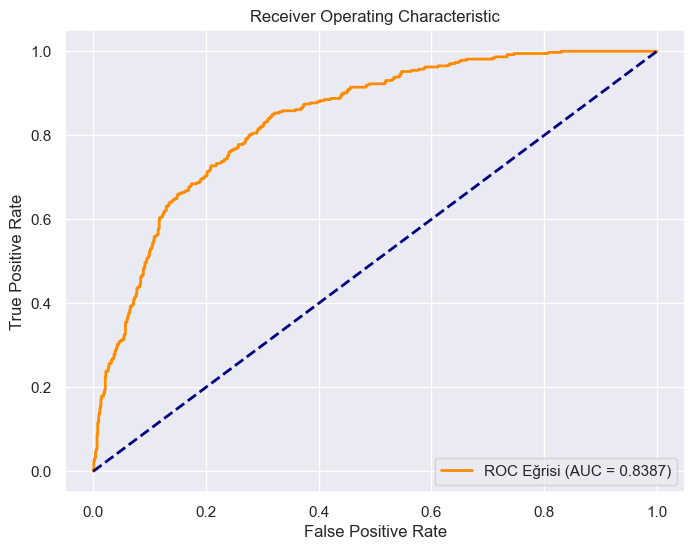

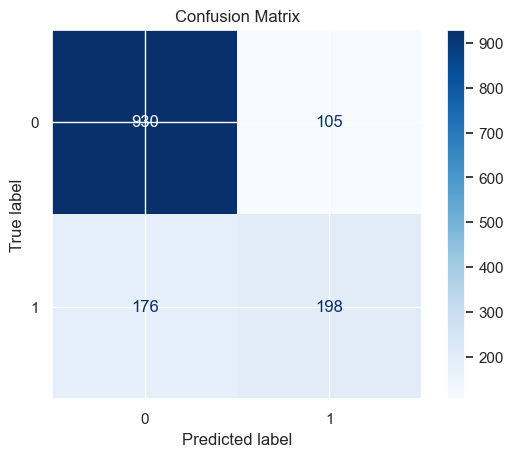

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.8006
Recall   : 0.5294
Precision: 0.6535
F1 Score : 0.5849
AUC      : 0.8387


In [126]:
from sklearn.metrics import roc_curve, auc as calc_auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Final modeli eğitim verileri ile tekrar eğitiyoruz (eğer daha önce fit etmediyseniz)
final_model.fit(X_train, y_train)

# Test seti üzerinde tahminler
y_final_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf olasılıkları

# ROC Eğrisi için hesaplamalar
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = calc_auc(fpr, tpr)

# ROC Eğrisini çizdirme
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC Eğrisi (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Karışıklık Matrisi hesaplama ve çizdirme
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")

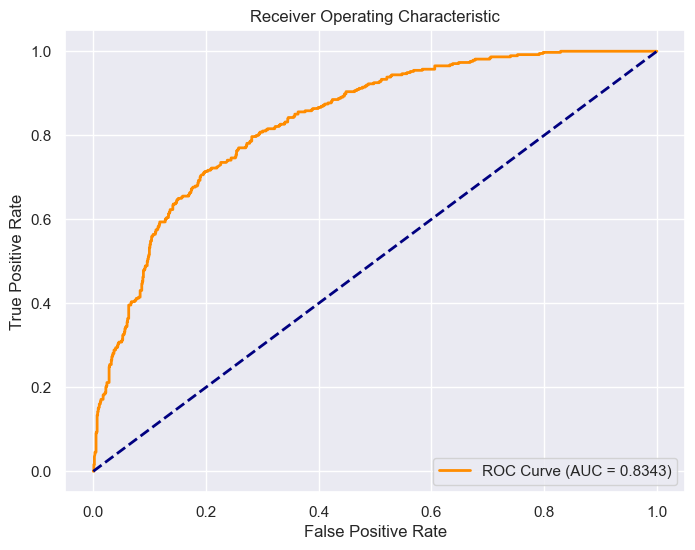

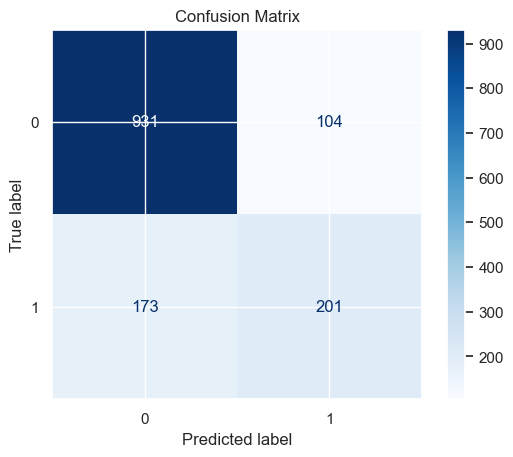

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.8034
Recall   : 0.5374
Precision: 0.6590
F1 Score : 0.5920
AUC      : 0.8343


In [119]:
# Identify the best model based on Test Accuracy
best_row = optimized_df.loc[optimized_df['Test Accuracy'].idxmax()]
model_name = best_row['Model']
best_params = best_row['Best Params']

# Find the corresponding base model from models_to_optimize
base_model = None
for name, model in models_to_optimize:
    if name == model_name:
        base_model = model
        break
if base_model is None:
    raise ValueError(f"Model {model_name} not found in models_to_optimize")

# Clone the base model and set the best parameters
from sklearn.base import clone
best_model = clone(base_model)
best_model.set_params(**best_params)

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Test set predictions
y_final_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Positive class probabilities

# ROC Curve calculations
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Performance metrics
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")